# **Chennai House Price Prediction**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?



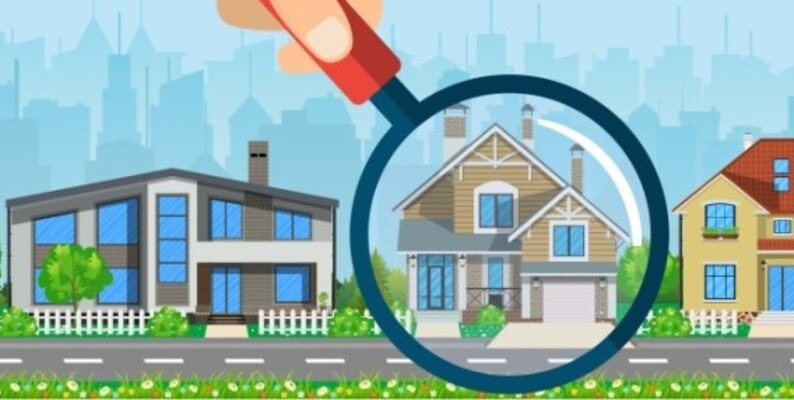

# **Data**
The historical sale data is available here: https://drive.google.com/file/d/1hqlG0IqJh87-GiMNL_KAtbtZppMO07Hb/view

# **Minimum Requirements**

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

# **Objective:** 

1)The model must be analysed to find the important factors that contribute towards the price.

2)It will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

# **DATA COLLECTION & CLEANING (DATA PREPROCESSING)**

**1. IMPORTING THE DEPENDENCIES**

In [1]:
# Import necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
# Remove deprecation warnings
import warnings
warnings.filterwarnings('ignore')

**2.CONVERTING THE FILE TO DATAFRAME**

In [2]:
chennai = pd.read_csv("/content/train-chennai-sale.csv")
chennai=pd.DataFrame(chennai)
chennai

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P03210  Karapakkam      1004  04-05-2011            131        1.0   
1     P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2     P01812       Adyar       909  04-02-2012             70        1.0   
3     P05346   Velachery      1855  13-03-2010             14        3.0   
4     P06210  Karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  Karapakkam       598  03-01-2011             51        1.0   
7105  P10000   Velachery      1897  08-04-2004             52        3.0   
7106  P09594   Velachery      1614  25-08-2006            152        2.0   
7107  P06508  Karapakkam       787  03-08-2009             40        1.0   
7108  P09794   Velachery      1896  13-07-2005            156        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
0            1.0       3     AbNormal        Yes  ...        AllPub   
1            1.0       5     AbNormal         No  ...        AllPub   
2            1.0       3     AbNormal        Yes  ...           ELO   
3            2.0       5       Family         No  ...       NoSewr    
4            1.0       3     AbNormal        Yes  ...        AllPub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      AdjLand         No  ...           ELO   
7105         2.0       5       Family        Yes  ...        NoSeWa   
7106         1.0       4  Normal Sale         No  ...        NoSeWa   
7107         1.0       2      Partial        Yes  ...           ELO   
7108         2.0       5      Partial        Yes  ...           ELO   

         STREET MZZONE QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      COMMIS  SALES_PRICE  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7109 rows x 22 columns]

# **Feature Description:**



*   **PRT_ID** - Propert ID of the dataset
*   **AREA(CATEGORICAL)**- Areas around chennai province.
*   **INT_SQFT(CONTINUOUS)**- The interior square feet of the property.
*   **DIST_MAINROAD(CONTINUOUS)**- distance of the property from the main road.
*   **N_BEDROOM(CONTINUOUS)**- Number of bedrooms in the house.
*   **N_BATHROOM(CONTINUOUS)**- Number of bathrooms in the house.
*   **N_ROOM(CONTINUOUS)**-Total number of rooms in the property.
*   **SALE_COND(CATEGORICAL)**- Sale condition of the property.
*   **PARK_FACIL(BINARY_CATEGORICAL)**-Parking facility of the dataset.
*   **BUILD_TYPE(BINARY_CATEGORICAL)**- Type of the building.	
*   **UTILITY_AVAIL(CATEGORICAL)**-Utilities available around 
*   **STREET(CATEGORICAL)**-Street type around.
*   **MZZONE(CATEGORICAL)**- Zonal area differrence.MZ- Militarized Zone is a logical network    without any access from the public network. Designed for systems without direct customer connectivity (e.g. databases containing sensitive data) and high security demands
*   **QS_ROOMS(CONTINUOUS)**-Quality review of previous buyer on rooms.
*   **QS_BATHROOM(CONTINUOUS)**-Quality review of previous buyer on bathroom.
*   **QS_BEDROOM(CONTINUOUS)**-Quality review of previous buyer on bedroom.
*   **QS_OVERALL(CONTINUOUS)**-Overall quality score assigned to the property by previous buyers.
*   **REG_FEE(CONTINUOUS)**- Registration fee of the property.
*   **COMMIS(CONTINUOUS)**-	Commission to the property.
*   **SALES_PRICE(CONTINUOUS)**- Sales price of the propert (output prediction)

Converting the csv file to pandas dataframe



*  There are totally 7109 rows and 22 columns
*  Out of which **PRT_ID** is not useful in this case of study.
*  **REG_FEE** is not used at the time of prediction so it will be removed at the later part.
*  **COMMIS** is not used at the time of prediction so it will be removed at the later part.



**3. CHECKING THE SHAPE OF DATASET**

In [4]:
print("Number of Datapoints in the dataset: {0} \nand\nNumber of Features in dataset:{1}".format(chennai.shape[0],chennai.shape[1]))

Number of Datapoints in the dataset: 7109 
and
Number of Features in dataset:22


The Dataframe has 7109 rows and 22 columns

**4.STATISTICAL INTERPRETATION OF DATASET**

In [5]:
chennai.describe().T

count          mean           std        min         25%  \
INT_SQFT       7109.0  1.382073e+03  4.574109e+02      500.0      993.00   
DIST_MAINROAD  7109.0  9.960318e+01  5.740311e+01        0.0       50.00   
N_BEDROOM      7108.0  1.637029e+00  8.029016e-01        1.0        1.00   
N_BATHROOM     7104.0  1.213260e+00  4.096387e-01        1.0        1.00   
N_ROOM         7109.0  3.688704e+00  1.019099e+00        2.0        3.00   
QS_ROOMS       7109.0  3.517471e+00  8.919724e-01        2.0        2.70   
QS_BATHROOM    7109.0  3.507244e+00  8.978337e-01        2.0        2.70   
QS_BEDROOM     7109.0  3.485300e+00  8.872664e-01        2.0        2.70   
QS_OVERALL     7061.0  3.503254e+00  5.272229e-01        2.0        3.13   
REG_FEE        7109.0  3.769383e+05  1.430707e+05    71177.0   272406.00   
COMMIS         7109.0  1.410057e+05  7.876809e+04     5055.0    84219.00   
SALES_PRICE    7109.0  1.089491e+07  3.768603e+06  2156875.0  8272100.00   

                      50%          75%          max  
INT_SQFT           1373.0      1744.00      2500.00  
DIST_MAINROAD        99.0       148.00       200.00  
N_BEDROOM             1.0         2.00         4.00  
N_BATHROOM            1.0         1.00         2.00  
N_ROOM                4.0         4.00         6.00  
QS_ROOMS              3.5         4.30         5.00  
QS_BATHROOM           3.5         4.30         5.00  
QS_BEDROOM            3.5         4.30         5.00  
QS_OVERALL            3.5         3.89         4.97  
REG_FEE          349486.0    451562.00    983922.00  
COMMIS           127628.0    184506.00    495405.00  
SALES_PRICE    10335050.0  12993900.00  23667340.00

Statistical relationship of the numerical datatset in the dataframe

**Prints the information of the dataset**


In [6]:
chennai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

Every features has 7109 non-null values except N_BEDROOM with 7018,N_BATHROOM with 7104 and QS_OVERALL with 7061

**5.CHECK THE NULL VALUES IN THE DATASET**

In [7]:
chennai.isnull().sum().T

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

**N_BEDROOM,N_BATHROOM,QS_OVERALL** has null values and QS_OVERALL has a majority  of the null values.       


**PRT_ID** column should be deleted as it contatins no meaning/ information to the dataset and there may be chances of overfitting the model.

In [13]:
chennai.isnull().sum().T

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
chennai=chennai.drop(columns='PRT_ID')

Now the Dataset contains 7109 rows and 21 features.

**6.STATISTICAL FEATURE IMPORTANCE OF DATASET**

In [16]:
for i in chennai.columns:
  print("Statistical Feature: {0}".format(i))
  print(chennai[i].describe().T)
  print("------------------------------------")

Statistical Feature: AREA
count         7109
unique          17
top       Chrompet
freq          1681
Name: AREA, dtype: object
------------------------------------
Statistical Feature: INT_SQFT
count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64
------------------------------------
Statistical Feature: DATE_SALE
count           7109
unique          2798
top       06-10-2009
freq              12
Name: DATE_SALE, dtype: object
------------------------------------
Statistical Feature: DIST_MAINROAD
count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64
------------------------------------
Statistical Feature: N_BEDROOM
count    7108.000000
mean        1.637029
std         0.802902
min         1.00

Statistical count of each feature in the dataset

**7.VISUALIZING THE NULL VALUES IN THE DATASET**

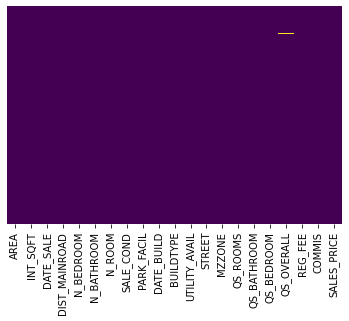

In [19]:
#Matplotlib will give you viridis as a default colormaps
sns.heatmap(chennai.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The plot shows the highest number of missing values in the dataset in QS_OVERALL

**8.FINDING THE MISSING VALUES PERCENTAGE IN THE DATASET**

In [21]:
#Finding out the number of nan values in each feature
#List of features which has missing values
features_with_na=[features for features in chennai.columns if chennai[features].isnull().sum()>0]
#printing the feature value with percentage of missing value in each feature
for features in features_with_na:
  print(features,np.round(chennai[features].isnull().mean(),4),"% Missing Values")

N_BEDROOM 0.0001 % Missing Values
N_BATHROOM 0.0007 % Missing Values
QS_OVERALL 0.0068 % Missing Values


QS_OVERALL has more missing values in the dataset.



**9.Dropping null values in this case doesn't affect the information present in the dataset**

In [22]:
chennai=chennai.dropna(how='any',axis=0)
chennai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7056 non-null   object 
 1   INT_SQFT       7056 non-null   int64  
 2   DATE_SALE      7056 non-null   object 
 3   DIST_MAINROAD  7056 non-null   int64  
 4   N_BEDROOM      7056 non-null   float64
 5   N_BATHROOM     7056 non-null   float64
 6   N_ROOM         7056 non-null   int64  
 7   SALE_COND      7056 non-null   object 
 8   PARK_FACIL     7056 non-null   object 
 9   DATE_BUILD     7056 non-null   object 
 10  BUILDTYPE      7056 non-null   object 
 11  UTILITY_AVAIL  7056 non-null   object 
 12  STREET         7056 non-null   object 
 13  MZZONE         7056 non-null   object 
 14  QS_ROOMS       7056 non-null   float64
 15  QS_BATHROOM    7056 non-null   float64
 16  QS_BEDROOM     7056 non-null   float64
 17  QS_OVERALL     7056 non-null   float64
 18  REG_FEE 

Each of the dataset drops the null values from 7109 to 7056

**10.CHECKING AND DROPPING THE DUPLICATE RECORDS IN THE DATASET**

In [24]:
chennai=chennai.drop_duplicates()
chennai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7056 non-null   object 
 1   INT_SQFT       7056 non-null   int64  
 2   DATE_SALE      7056 non-null   object 
 3   DIST_MAINROAD  7056 non-null   int64  
 4   N_BEDROOM      7056 non-null   float64
 5   N_BATHROOM     7056 non-null   float64
 6   N_ROOM         7056 non-null   int64  
 7   SALE_COND      7056 non-null   object 
 8   PARK_FACIL     7056 non-null   object 
 9   DATE_BUILD     7056 non-null   object 
 10  BUILDTYPE      7056 non-null   object 
 11  UTILITY_AVAIL  7056 non-null   object 
 12  STREET         7056 non-null   object 
 13  MZZONE         7056 non-null   object 
 14  QS_ROOMS       7056 non-null   float64
 15  QS_BATHROOM    7056 non-null   float64
 16  QS_BEDROOM     7056 non-null   float64
 17  QS_OVERALL     7056 non-null   float64
 18  REG_FEE 

Each of the dataset drops the duplicate values from 7109 to 7056

**11. CHECKING THE NULL VALUES IN THE DATASET USING HEATMAP**

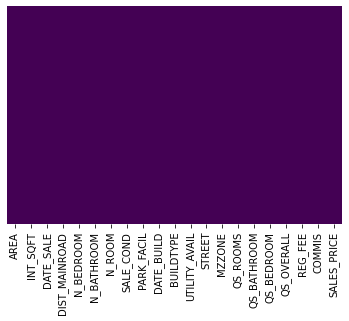

In [26]:
sns.heatmap(chennai.isnull(),yticklabels=False,cbar=False,cmap="viridis")

Number of null and duplicate values in the data sets are dropped.

In [27]:
chennai1=chennai.copy()

**12.CONVERTING THE OBJECTS TO DATETIME OBJECTS**

In [28]:
chennai["DATE_SALE"] = pd.to_datetime(chennai["DATE_SALE"])
chennai['DATE_BUILD']=pd.to_datetime(chennai["DATE_BUILD"])
chennai.head()

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  Karapakkam      1004 2011-04-05            131        1.0         1.0   
1  Anna Nagar      1986 2006-12-19             26        2.0         1.0   
2       Adyar       909 2012-04-02             70        1.0         1.0   
3   Velachery      1855 2010-03-13             14        3.0         2.0   
4  Karapakkam      1226 2009-05-10             84        1.0         1.0   

   N_ROOM SALE_COND PARK_FACIL DATE_BUILD  ... UTILITY_AVAIL  STREET MZZONE  \
0       3  AbNormal        Yes 1967-05-15  ...        AllPub   Paved      A   
1       5  AbNormal         No 1995-12-22  ...        AllPub  Gravel     RH   
2       3  AbNormal        Yes 1992-09-02  ...           ELO  Gravel     RL   
3       5    Family         No 1988-03-18  ...       NoSewr    Paved      I   
4       3  AbNormal        Yes 1979-10-13  ...        AllPub  Gravel      C   

  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0          3.9         4.9       4.330   380000  144400      7600000  
1      4.9          4.2         2.5       3.765   760122  304049     21717770  
2      4.1          3.8         2.2       3.090   421094   92114     13159200  
3      4.7          3.9         3.6       4.010   356321   77042      9630290  
4      3.0          2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 21 columns]

**13. TAKING THE YEARS OF COMPARISON**

In [29]:
chennai['Yearsold']=chennai['DATE_SALE'].dt.year
chennai['Yearbuild']=chennai['DATE_BUILD'].dt.year

**14. TIME CALCULATION OF HOUSELIFE**

In [30]:
chennai['Houselife']=chennai['Yearsold']-chennai['Yearbuild']

**15. DROPPING THE UNWANTED DATE COLUMN**

In [31]:
chennai=chennai.drop(columns=["DATE_SALE","DATE_BUILD"])

**DATASET After Data Processing**

In [32]:
chennai.head()

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0  Karapakkam      1004            131        1.0         1.0       3   
1  Anna Nagar      1986             26        2.0         1.0       5   
2       Adyar       909             70        1.0         1.0       3   
3   Velachery      1855             14        3.0         2.0       5   
4  Karapakkam      1226             84        1.0         1.0       3   

  SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL  ... QS_ROOMS QS_BATHROOM  \
0  AbNormal        Yes  Commercial        AllPub  ...      4.0         3.9   
1  AbNormal         No  Commercial        AllPub  ...      4.9         4.2   
2  AbNormal        Yes  Commercial           ELO  ...      4.1         3.8   
3    Family         No      Others       NoSewr   ...      4.7         3.9   
4  AbNormal        Yes      Others        AllPub  ...      3.0         2.5   

   QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  Yearsold  Yearbuild  \
0         4.9       4.330   380000  144400      7600000      2011       1967   
1         2.5       3.765   760122  304049     21717770      2006       1995   
2         2.2       3.090   421094   92114     13159200      2012       1992   
3         3.6       4.010   356321   77042      9630290      2010       1988   
4         4.1       3.290   237000   74063      7406250      2009       1979   

   Houselife  
0         44  
1         11  
2         20  
3         22  
4         30  

[5 rows x 22 columns]

# **EXPLORATORY DATA ANALYSIS (EDA)**

**1.FINDING THE WRONG FORMAT ENTRIES**

In [34]:
# list of categorical variables
categorical_features=[features for features in chennai.columns if chennai[features].dtypes=='O']
categorical_features=chennai[categorical_features]
for features in categorical_features:
    print("The feature is {} and Number of categories are: {}".format(features,(chennai[features].unique())))

The feature is AREA and Number of categories are: ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
The feature is SALE_COND and Number of categories are: ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
The feature is PARK_FACIL and Number of categories are: ['Yes' 'No' 'Noo']
The feature is BUILDTYPE and Number of categories are: ['Commercial' 'Others' 'Other' 'House' 'Comercial']
The feature is UTILITY_AVAIL and Number of categories are: ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
The feature is STREET and Number of categories are: ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
The feature is MZZONE and Number of categories are: ['A' 'RH' 'RL' 'I' 'C' 'RM']


**2.REPLACING THE WRONG FORMAT ENTRIES AND VISUALIZE THE DATA TO FIND HOW IT IS DISTRIBUTED**

In [36]:
chennai

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0     Karapakkam      1004            131        1.0         1.0       3   
1     Anna Nagar      1986             26        2.0         1.0       5   
2          Adyar       909             70        1.0         1.0       3   
3      Velachery      1855             14        3.0         2.0       5   
4     Karapakkam      1226             84        1.0         1.0       3   
...          ...       ...            ...        ...         ...     ...   
7104  Karapakkam       598             51        1.0         1.0       2   
7105   Velachery      1897             52        3.0         2.0       5   
7106   Velachery      1614            152        2.0         1.0       4   
7107  Karapakkam       787             40        1.0         1.0       2   
7108   Velachery      1896            156        3.0         2.0       5   

        SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL  ... QS_ROOMS  \
0        AbNormal        Yes  Commercial        AllPub  ...      4.0   
1        AbNormal         No  Commercial        AllPub  ...      4.9   
2        AbNormal        Yes  Commercial           ELO  ...      4.1   
3          Family         No      Others       NoSewr   ...      4.7   
4        AbNormal        Yes      Others        AllPub  ...      3.0   
...           ...        ...         ...           ...  ...      ...   
7104      AdjLand         No      Others           ELO  ...      3.0   
7105       Family        Yes      Others        NoSeWa  ...      3.6   
7106  Normal Sale         No       House        NoSeWa  ...      4.3   
7107      Partial        Yes  Commercial           ELO  ...      4.6   
7108      Partial        Yes      Others           ELO  ...      3.1   

     QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  \
0            3.9         4.9       4.330   380000  144400      7600000   
1            4.2         2.5       3.765   760122  304049     21717770   
2            3.8         2.2       3.090   421094   92114     13159200   
3            3.9         3.6       4.010   356321   77042      9630290   
4            2.5         4.1       3.290   237000   74063      7406250   
...          ...         ...         ...      ...     ...          ...   
7104         2.2         2.4       2.520   208767  107060      5353000   
7105         4.5         3.3       3.920   346191  205551     10818480   
7106         4.2         2.9       3.840   317354  167028      8351410   
7107         3.8         4.1       4.160   425350  119098      8507000   
7108         3.5         4.3       3.640   349177   79812      9976480   

      Yearsold  Yearbuild  Houselife  
0         2011       1967         44  
1         2006       1995         11  
2         2012       1992         20  
3         2010       1988         22  
4         2009       1979         30  
...        ...        ...        ...  
7104      2011       1962         49  
7105      2004       1995          9  
7106      2006       1978         28  
7107      2009       1977         32  
7108      2005       1961         44  

[7056 rows x 22 columns]

**2.1 SPELLING CORRECTION AND VISULAIZATION OF THE AREA FEATURES COUNT**

In [38]:
chennai.AREA.value_counts()

Chrompet      1671
Karapakkam    1356
KK Nagar       989
Velachery      973
Anna Nagar     772
Adyar          768
T Nagar        490
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

AREA Feature with number of duplicate values can be identified from the above.

Chrompet      1691
Karapakkam    1359
KK Nagar       990
Velachery      975
Anna Nagar     777
Adyar          769
T Nagar        495
Name: AREA, dtype: int64 



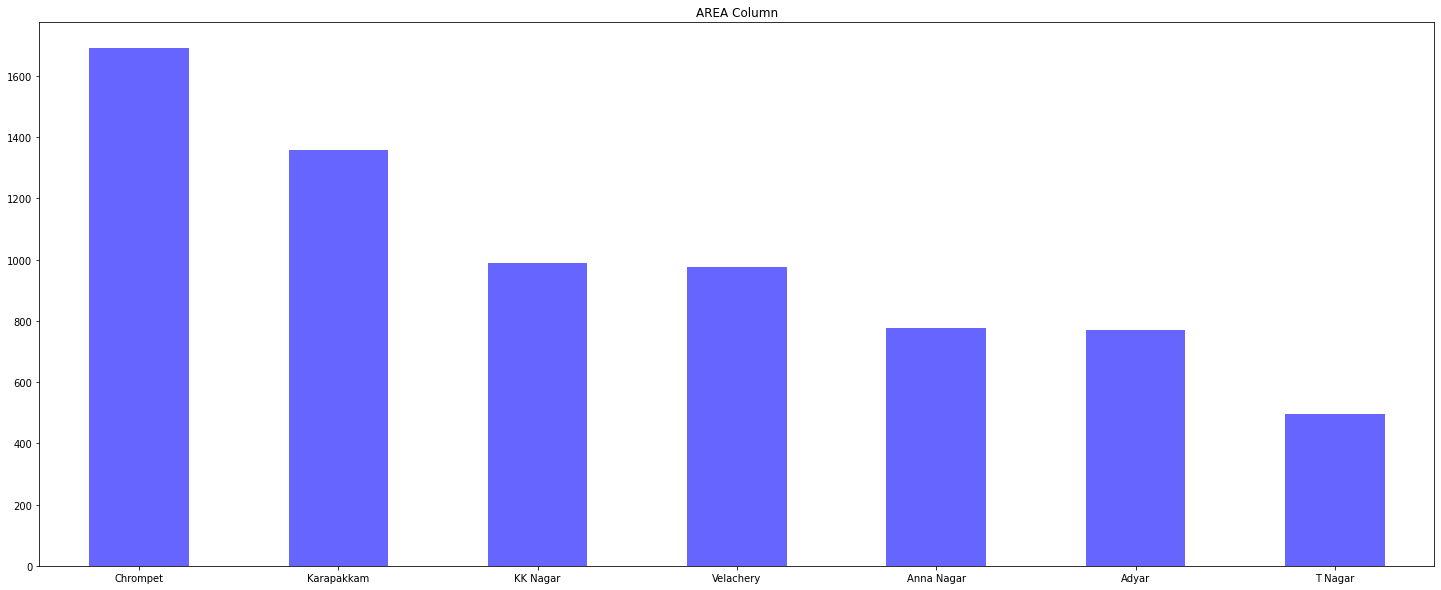

In [40]:
#Corecting the mistaken spelling to its correct form
chennai["AREA"]=chennai["AREA"].replace(['TNagar','Chrompt','Chrmpet','Karapakam','Ana Nagar','Chormpet','Adyr','Velchery','Ann Nagar','KKNagar'],
                                          ['T Nagar','Chrompet','Chrompet','Karapakkam','Anna Nagar','Chrompet','Adyar','Velachery','Anna Nagar','KK Nagar'])
#Counting the spelling corrections
print(chennai["AREA"].value_counts(),"\n")

#Barplot visualization of the AREA feature
plt.figure(figsize=(25,10))
plt.title("AREA Column")
chennai["AREA"].value_counts().plot(kind='bar',color='Blue',alpha=0.6)
chennai["AREA"].sort_index(ascending=True)
plt.xticks(rotation='horizontal')
plt.show()

**2.2 AREA removal of the wrong format values distribution count**

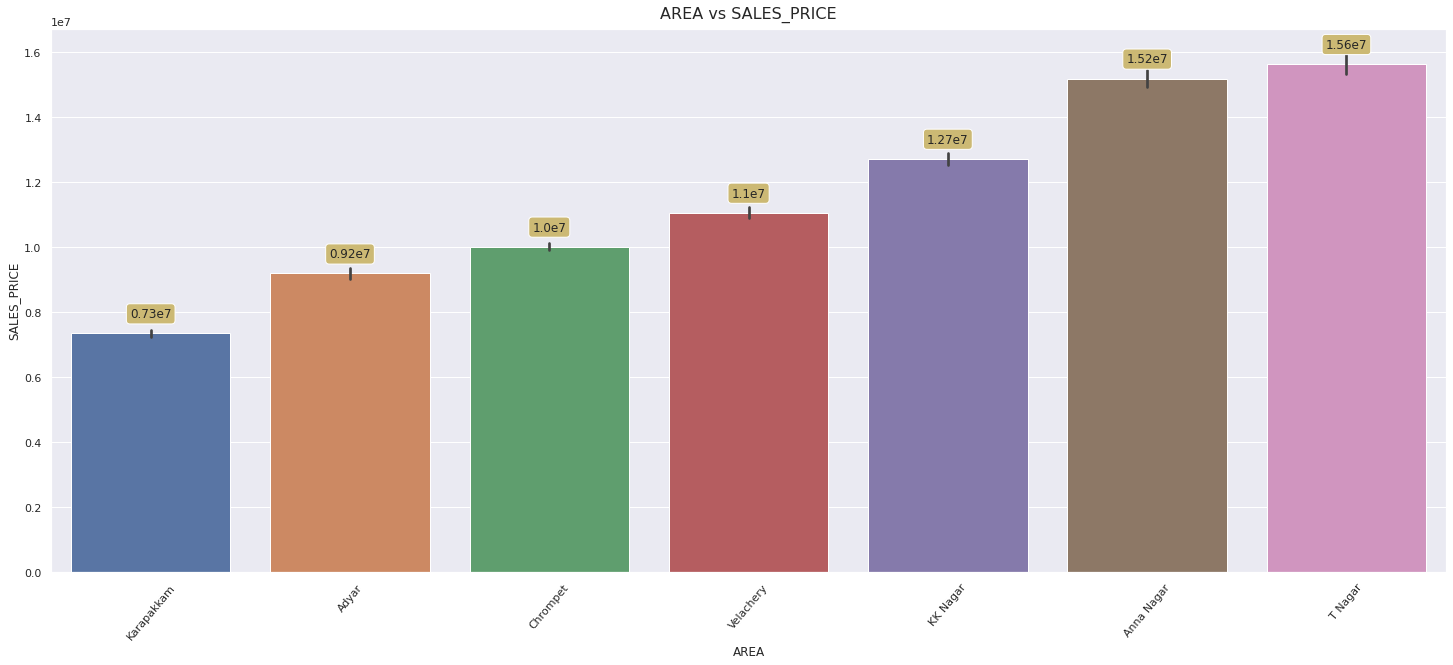

In [41]:
chennai["AREA"]=chennai["AREA"].replace(['TNagar','Chrompt','Chrmpet','Karapakam','Ana Nagar','Chormpet','Adyr','Velchery','Ann Nagar','KKNagar'],
                                          ['T Nagar','Chrompet','Chrompet','Karapakkam','Anna Nagar','Chrompet','Adyar','Velachery','Anna Nagar','KK Nagar'])
sns.set(rc={"figure.figsize":(25,10)})
f1=sns.barplot(x='AREA',y="SALES_PRICE",data=chennai,order=chennai.groupby("AREA")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["AREA"])
for i in f1.patches: 
   f1.annotate(str(round(i.get_height()/10**7,2))+"e7",xy=(i.get_x()+i.get_width()/2,i.get_height()+0.4*10**6),ha='center',va='bottom',bbox=dict(boxstyle="round",fc="y"))
plt.xticks(rotation=50)
plt.title("AREA vs SALES_PRICE",fontsize=16,va="bottom")
plt.show()

**2.3 SPELLING CORRECTION AND VISULAIZATION OF THE SALE_COND FEATURES COUNT**

In [42]:
chennai.SALE_COND.value_counts()

AdjLand        1426
Normal Sale    1416
Partial        1414
AbNormal       1396
Family         1390
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: SALE_COND, dtype: int64

AdjLand        1432
Partial        1417
Normal Sale    1416
AbNormal       1401
Family         1390
Name: SALE_COND, dtype: int64 



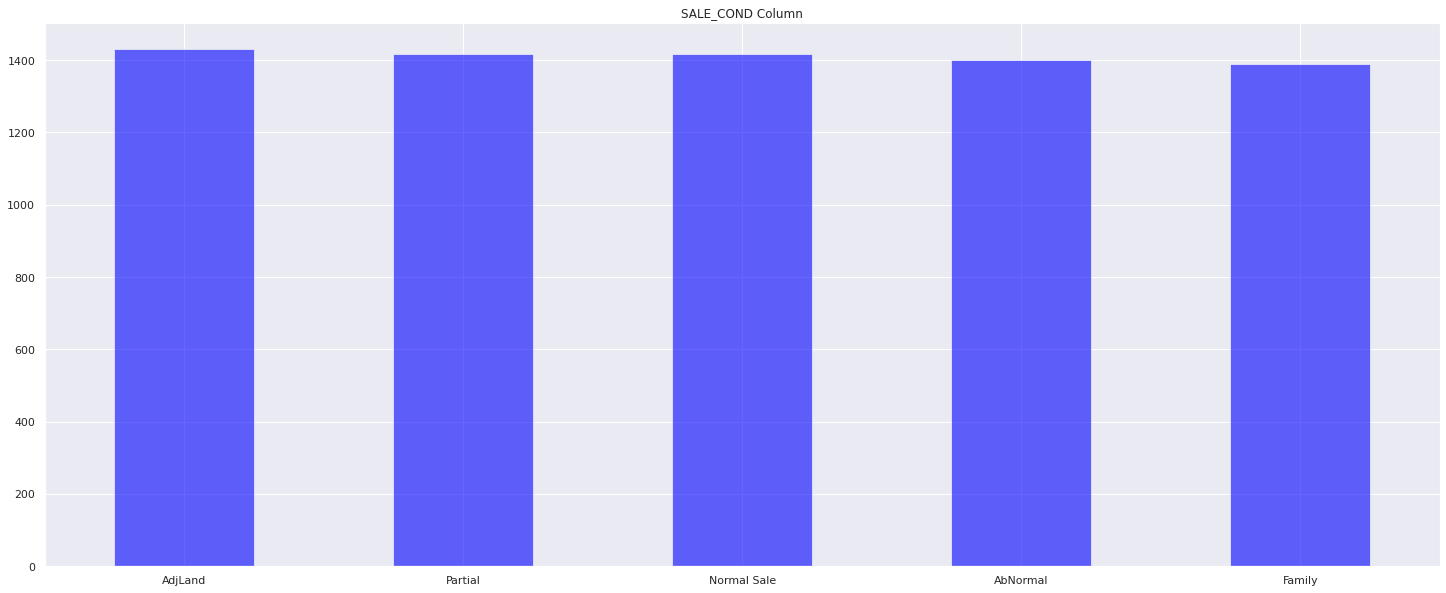

In [43]:
#Corecting the mistaken spelling to its correct form
chennai["SALE_COND"]=chennai["SALE_COND"].replace(['Ab Normal','Partiall','Adj Land','PartiaLl'],['AbNormal','Partial','AdjLand','Partial'])
#Counting the spelling corrections
print(chennai["SALE_COND"].value_counts(),"\n")

#Barplot visualization of the AREA feature
plt.figure(figsize=(25,10))
plt.title("SALE_COND Column")
chennai["SALE_COND"].value_counts().plot(kind='bar',color='blue',alpha=0.6)
plt.xticks(rotation='horizontal')
plt.show()

**2.4 SALE_COND removal of the wrong format values distribution count**

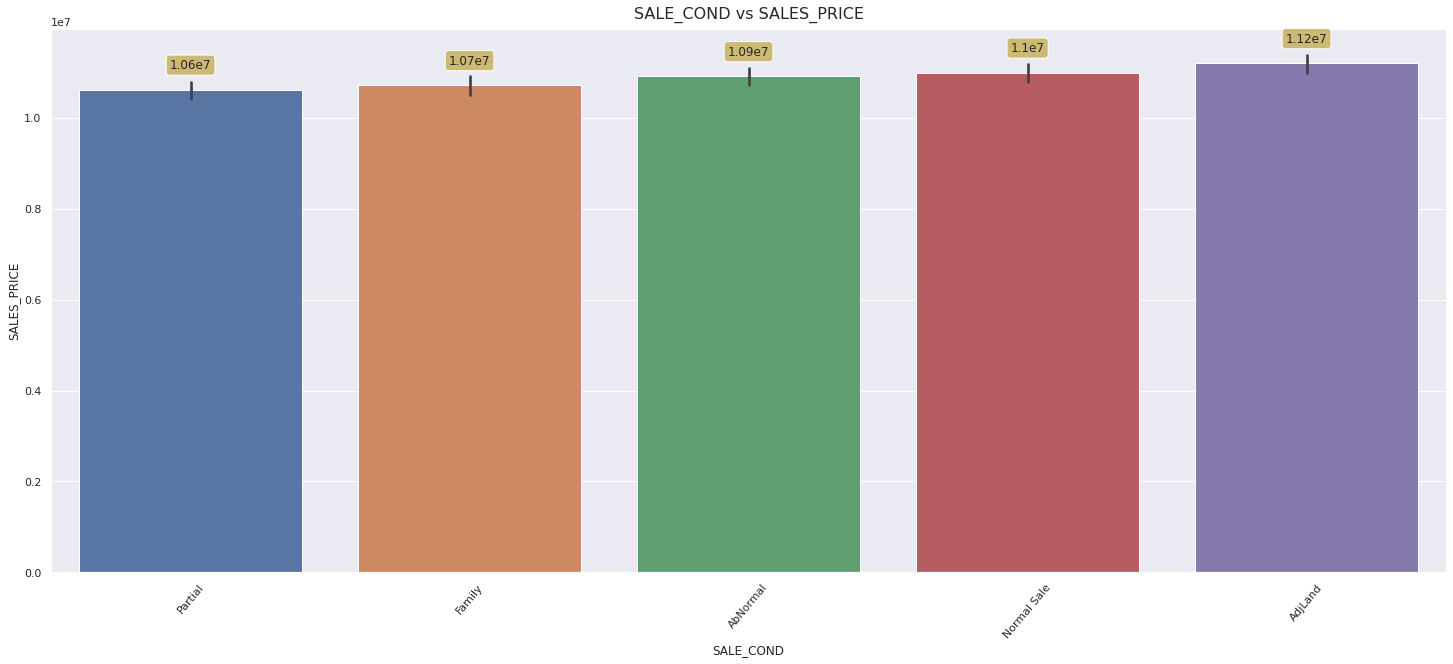

In [44]:
chennai["SALE_COND"]=chennai["SALE_COND"].replace(['Ab Normal','Partiall','Adj Land','PartiaLl'],['AbNormal','Partial','AdjLand','Partial'])
sns.set(rc={"figure.figsize":(25,10)})
f1=sns.barplot(x='SALE_COND',y="SALES_PRICE",data=chennai,order=chennai.groupby("SALE_COND")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["SALE_COND"])
for i in f1.patches: 
   f1.annotate(str(round(i.get_height()/10**7,2))+"e7",xy=(i.get_x()+i.get_width()/2,i.get_height()+0.4*10**6),ha='center',va='bottom',bbox=dict(boxstyle="round",fc="y"))
plt.xticks(rotation=50)
plt.title("SALE_COND vs SALES_PRICE",fontsize=16,va="bottom")
plt.show()

sale cond has equally distributed dataset

**2.5 SPELLING CORRECTION AND VISULAIZATION OF THE PARK_FACIL FEATURES COUNT**

In [45]:
chennai.PARK_FACIL.value_counts()

Yes    3557
No     3498
Noo       1
Name: PARK_FACIL, dtype: int64

Yes    3557
No     3499
Name: PARK_FACIL, dtype: int64 



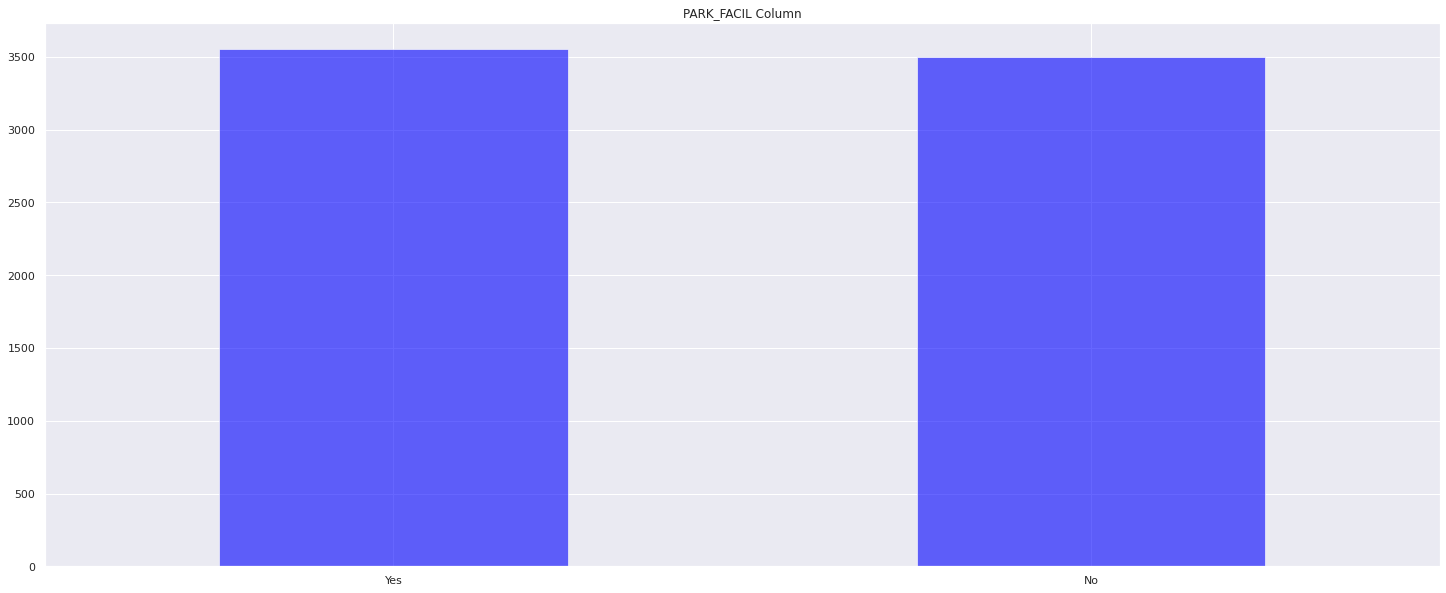

In [46]:
#Corecting the mistaken spelling to its correct form
chennai["PARK_FACIL"]=chennai["PARK_FACIL"].replace('Noo','No')
#Counting the spelling corrections
print(chennai["PARK_FACIL"].value_counts(),"\n")

#Barplot visualization of the AREA feature
plt.figure(figsize=(25,10))
plt.title("PARK_FACIL Column")
chennai["PARK_FACIL"].value_counts().plot(kind='bar',color='blue',alpha=0.6)
plt.xticks(rotation='horizontal')
plt.show()

**2.6 PARK_FACIL removal of the wrong format values distribution count**

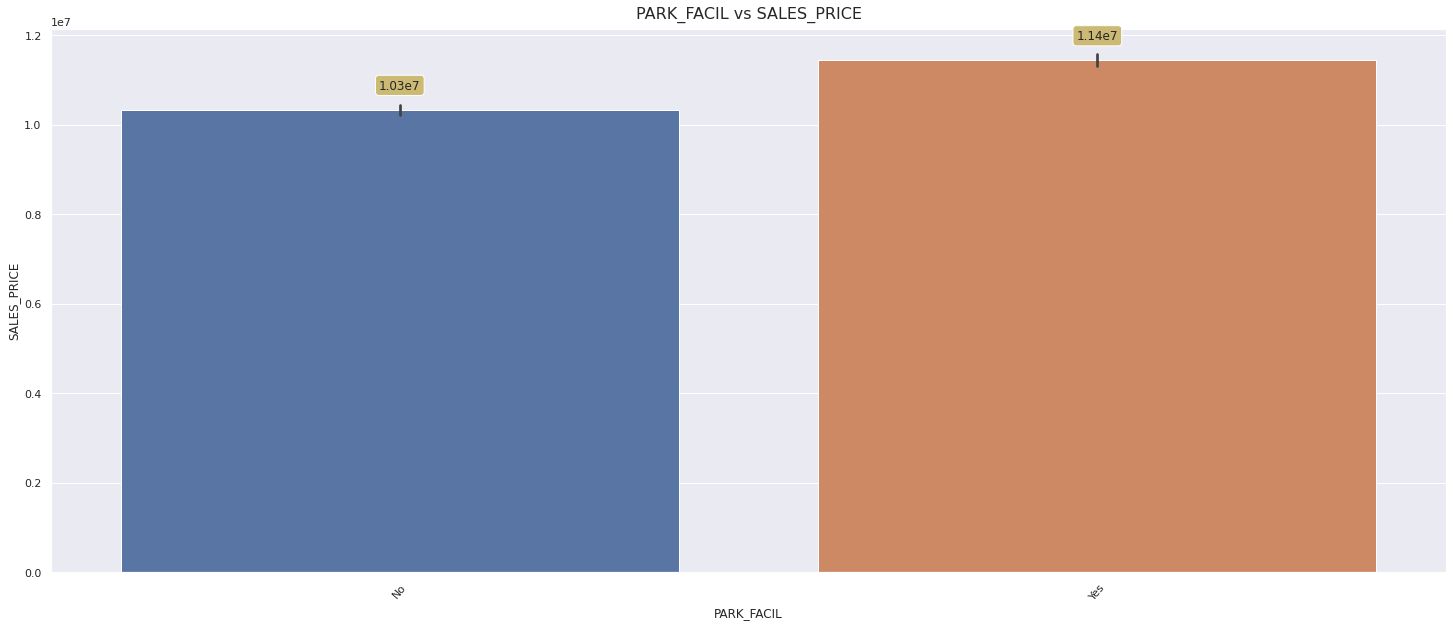

In [47]:
chennai["PARK_FACIL"]=chennai["PARK_FACIL"].replace(['Ab Normal','Partiall','Adj Land','PartiaLl'],['AbNormal','Partial','AdjLand','Partial'])
sns.set(rc={"figure.figsize":(25,10)})
f1=sns.barplot(x='PARK_FACIL',y="SALES_PRICE",data=chennai,order=chennai.groupby("PARK_FACIL")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["PARK_FACIL"])
for i in f1.patches: 
   f1.annotate(str(round(i.get_height()/10**7,2))+"e7",xy=(i.get_x()+i.get_width()/2,i.get_height()+0.4*10**6),ha='center',va='bottom',bbox=dict(boxstyle="round",fc="y"))
plt.xticks(rotation=50)
plt.title("PARK_FACIL vs SALES_PRICE",fontsize=16,va="bottom")
plt.show()

PARK_FACIL has a linear relationship in the dataset

**2.7 SPELLING CORRECTION AND VISULAIZATION OF THE BUILDTYPE FEATURES COUNT**

In [48]:
chennai.BUILDTYPE.value_counts()

House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
Name: BUILDTYPE, dtype: int64

House         2433
Others        2312
Commercial    2311
Name: BUILDTYPE, dtype: int64 



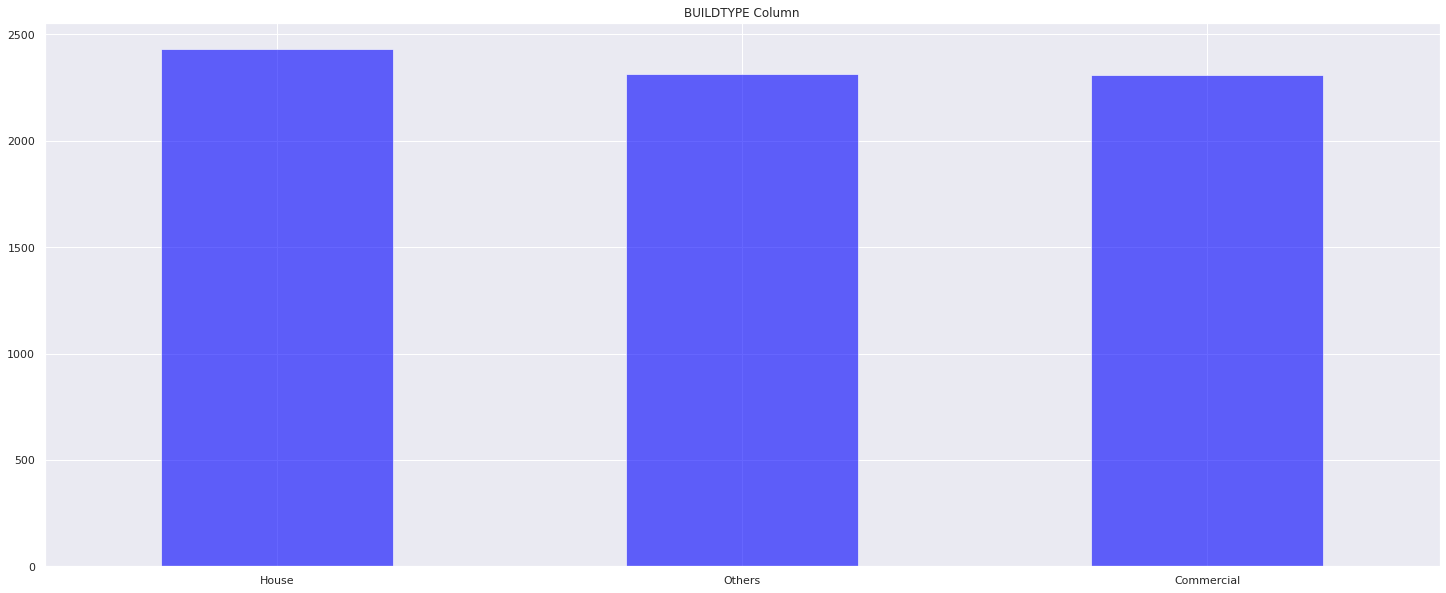

In [49]:
#Corecting the mistaken spelling to its correct form
chennai["BUILDTYPE"]=chennai["BUILDTYPE"].replace(['Other','Comercial'],['Others','Commercial'])
#Counting the spelling corrections
print(chennai["BUILDTYPE"].value_counts(),"\n")

#Barplot visualization of the AREA feature
plt.figure(figsize=(25,10))
plt.title("BUILDTYPE Column")
chennai["BUILDTYPE"].value_counts().plot(kind='bar',color='blue',alpha=0.6)
plt.xticks(rotation='horizontal')
plt.show()

**2.8 BUILDTYPE removal of the wrong format values distribution count**

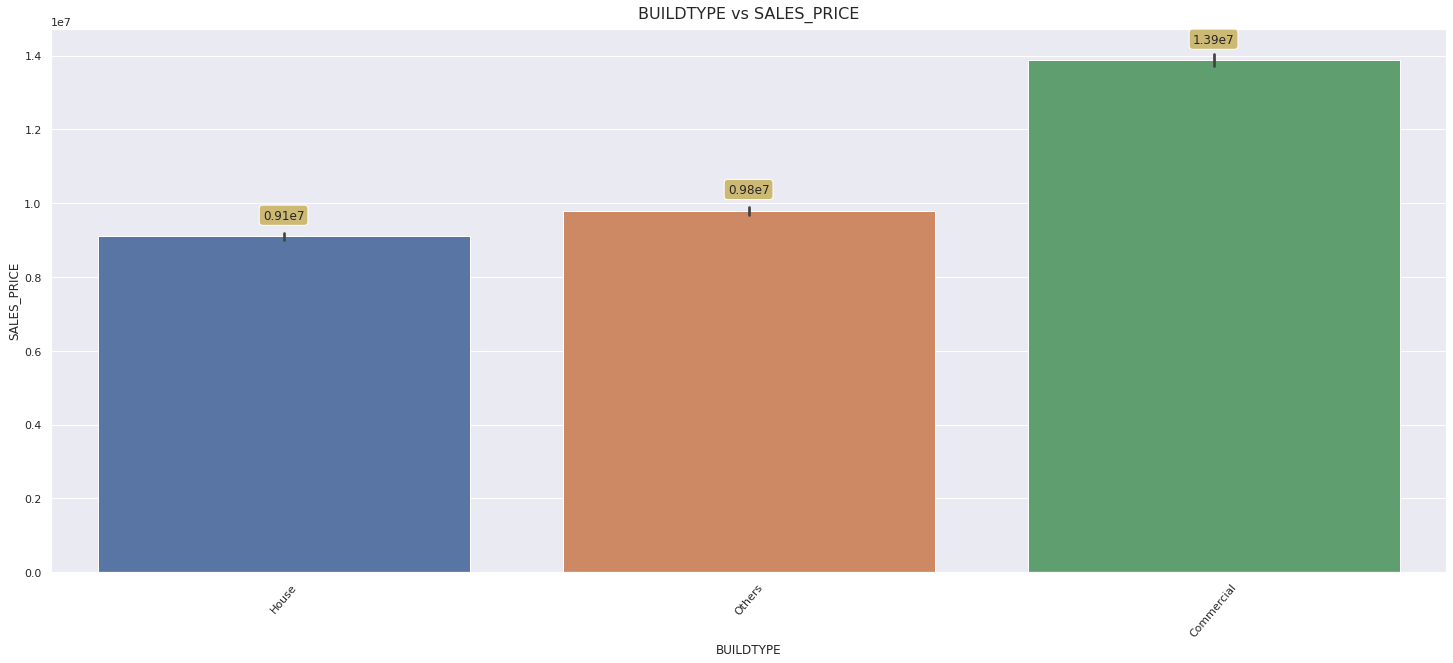

In [50]:
chennai["BUILDTYPE"]=chennai["BUILDTYPE"].replace(['Other','Comercial'],['Others','Commercial'])
sns.set(rc={"figure.figsize":(25,10)})
f1=sns.barplot(x='BUILDTYPE',y="SALES_PRICE",data=chennai,order=chennai.groupby("BUILDTYPE")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["BUILDTYPE"])
for i in f1.patches: 
   f1.annotate(str(round(i.get_height()/10**7,2))+"e7",xy=(i.get_x()+i.get_width()/2,i.get_height()+0.4*10**6),ha='center',va='bottom',bbox=dict(boxstyle="round",fc="y"))
plt.xticks(rotation=50)
plt.title("BUILDTYPE vs SALES_PRICE",fontsize=16,va="bottom")
plt.show()

BUILDTYPE has alinear relationship of the dataset.

**2.9 SPELLING CORRECTION AND VISULAIZATION OF THE UTILITY_AVAIL FEATURES COUNT**

In [51]:
chennai.UTILITY_AVAIL.value_counts()

AllPub     1874
NoSeWa     1860
NoSewr     1812
ELO        1509
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

NoSeWa    3672
AllPub    1875
ELO       1509
Name: UTILITY_AVAIL, dtype: int64 



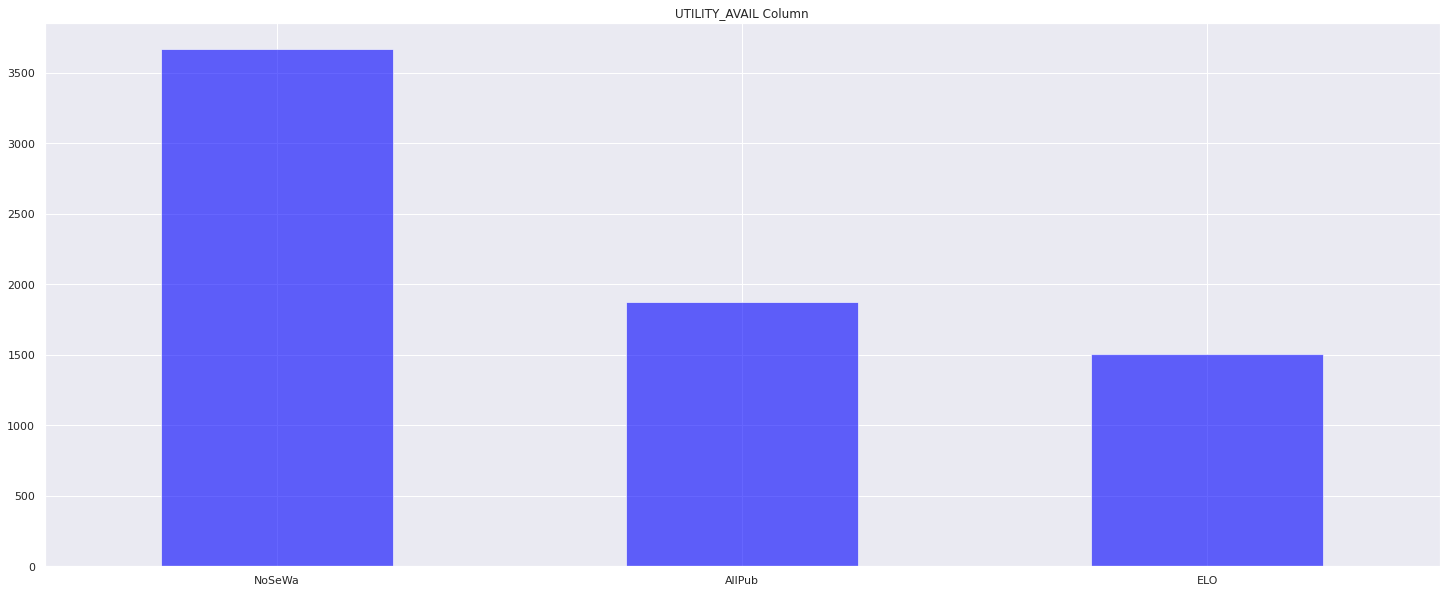

In [52]:
#Corecting the mistaken spelling to its correct form
chennai["UTILITY_AVAIL"]=chennai["UTILITY_AVAIL"].replace(['All Pub','NoSewr ','NoSewr'],['AllPub','NoSeWa','NoSeWa'])
#Counting the spelling corrections
print(chennai["UTILITY_AVAIL"].value_counts(),"\n")

#Barplot visualization of the AREA feature
plt.figure(figsize=(25,10))
plt.title("UTILITY_AVAIL Column")
chennai["UTILITY_AVAIL"].value_counts().plot(kind='bar',color='blue',alpha=0.6)
plt.xticks(rotation='horizontal')
plt.show()

**2.10 UTILITY_AVAIL removal of the wrong format values distribution count**

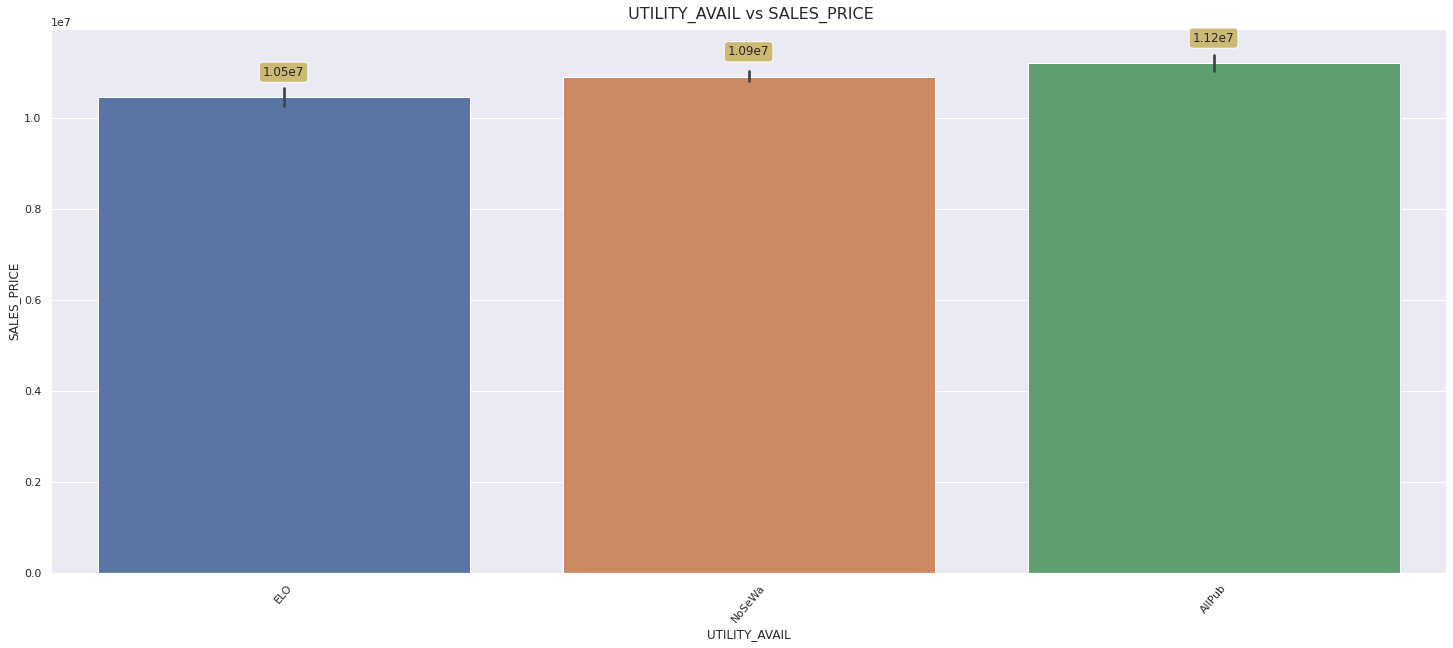

In [53]:
chennai["UTILITY_AVAIL"]=chennai["UTILITY_AVAIL"].replace(['All Pub','NoSewr ','NoSewr'],['AllPub','NoSeWa','NoSeWa'])
sns.set(rc={"figure.figsize":(25,10)})
f1=sns.barplot(x='UTILITY_AVAIL',y="SALES_PRICE",data=chennai,order=chennai.groupby("UTILITY_AVAIL")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["UTILITY_AVAIL"])
for i in f1.patches: 
   f1.annotate(str(round(i.get_height()/10**7,2))+"e7",xy=(i.get_x()+i.get_width()/2,i.get_height()+0.4*10**6),ha='center',va='bottom',bbox=dict(boxstyle="round",fc="y"))
plt.xticks(rotation=50)
plt.title(" UTILITY_AVAIL vs SALES_PRICE",fontsize=16,va="bottom")
plt.show()

dataset has a linear distribution of the dataset.

**2.11 SPELLING CORRECTION AND VISULAIZATION OF THE STREET FEATURES COUNT**

In [54]:
chennai.STREET.value_counts()

Paved        2542
Gravel       2502
No Access    1993
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

Paved        2554
Gravel       2502
No Access    2000
Name: STREET, dtype: int64 



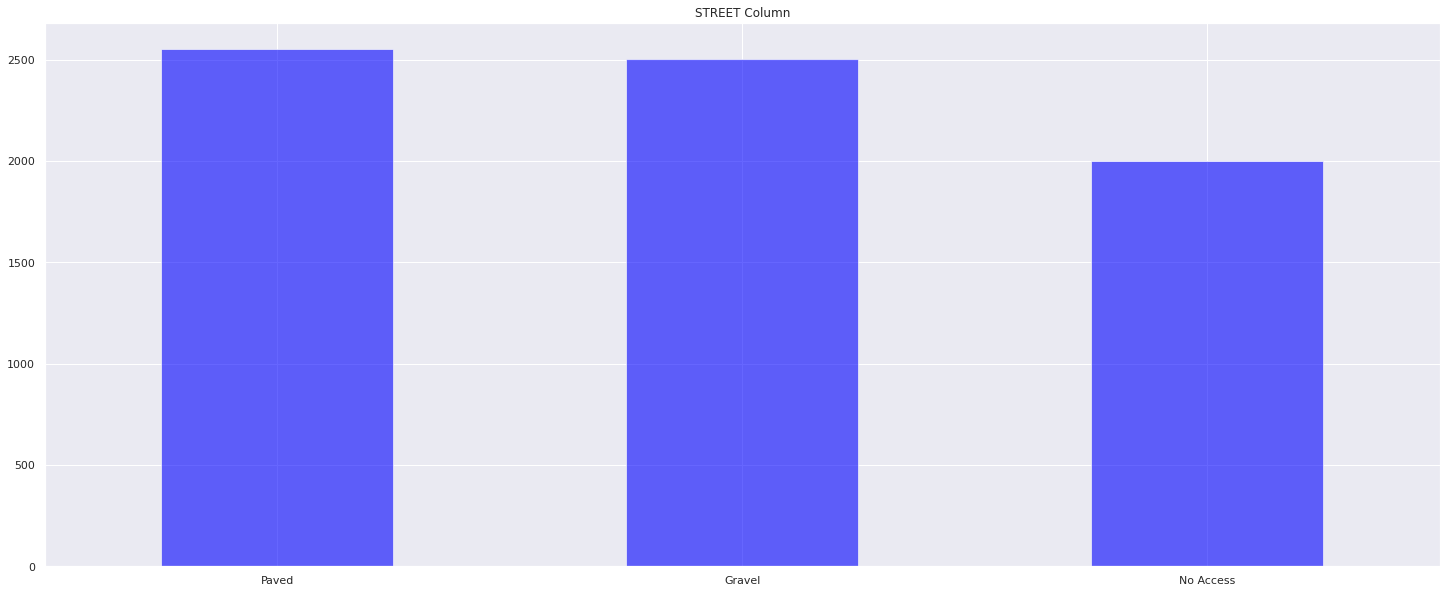

In [55]:
#Corecting the mistaken spelling to its correct form
chennai["STREET"]=chennai["STREET"].replace(['Pavd','NoAccess'],['Paved','No Access'])
#Counting the spelling corrections
print(chennai["STREET"].value_counts(),"\n")

#Barplot visualization of the AREA feature
plt.figure(figsize=(25,10))
plt.title("STREET Column")
chennai["STREET"].value_counts().plot(kind='bar',color='blue',alpha=0.6)
plt.xticks(rotation='horizontal')
plt.show()

**2.12  STREET removal of the wrong format values distribution count**

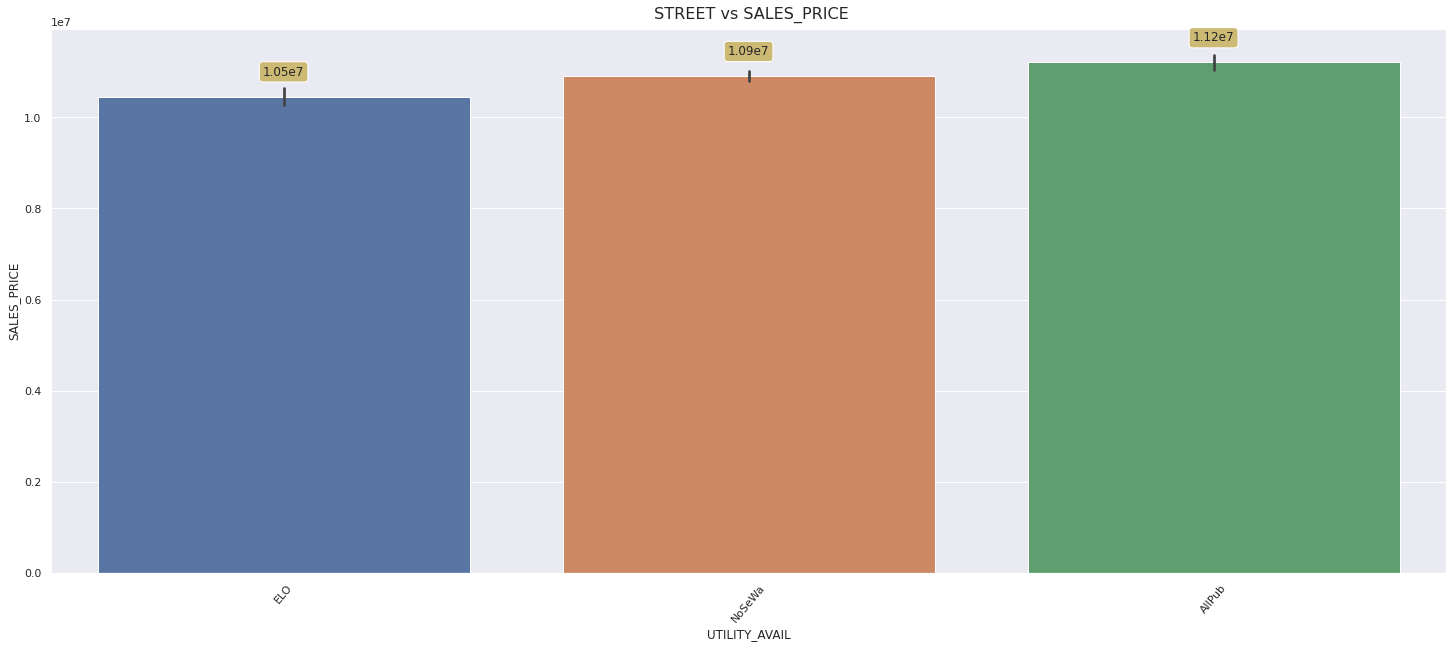

In [56]:
chennai["UTILITY_AVAIL"]=chennai["UTILITY_AVAIL"].replace(['Pavd','NoAccess'],['Paved','No Access'])
sns.set(rc={"figure.figsize":(25,10)})
f1=sns.barplot(x='UTILITY_AVAIL',y="SALES_PRICE",data=chennai,order=chennai.groupby("UTILITY_AVAIL")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["UTILITY_AVAIL"])
for i in f1.patches: 
   f1.annotate(str(round(i.get_height()/10**7,2))+"e7",xy=(i.get_x()+i.get_width()/2,i.get_height()+0.4*10**6),ha='center',va='bottom',bbox=dict(boxstyle="round",fc="y"))
plt.xticks(rotation=50)
plt.title(" STREET vs SALES_PRICE",fontsize=16,va="bottom")
plt.show()

STREET has a constant relationship.

**2.13 SPELLING CORRECTION AND VISULAIZATION OF THE MZZONE FEATURES COUNT**

In [ ]:
chennai.MZZONE.value_counts()

RL    1849
RH    1808
RM    1801
C      547
A      533
I      518
Name: MZZONE, dtype: int64

RL    1849
RH    1808
RM    1801
C      547
A      533
I      518
Name: MZZONE, dtype: int64 



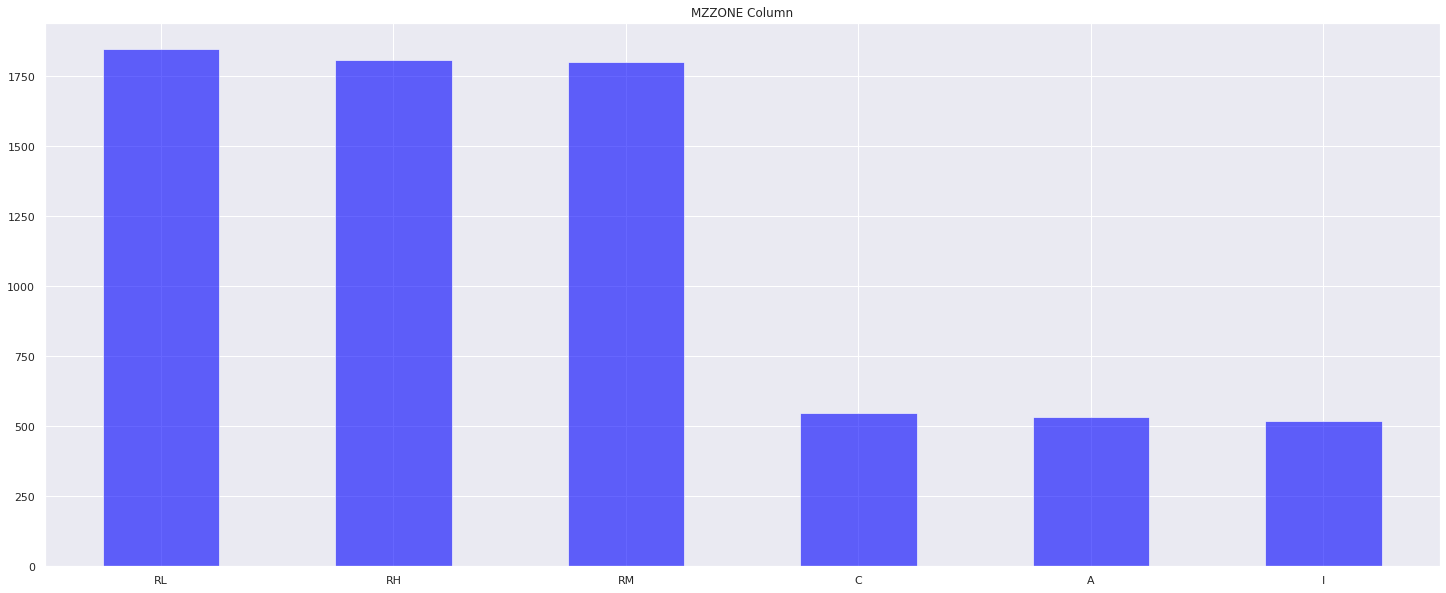

In [57]:
#Corecting the mistaken spelling to its correct form
#chennai_city["MZZONE"]=chennai_city["MZZONE"].replace(['Pavd','NoAccess'],['Paved','No Access'])
#Counting the spelling corrections
print(chennai["MZZONE"].value_counts(),"\n")

#Barplot visualization of the AREA feature
plt.figure(figsize=(25,10))
plt.title("MZZONE Column")
chennai["MZZONE"].value_counts().plot(kind='bar',color='blue',alpha=0.6)
plt.xticks(rotation='horizontal')
plt.show()

**2.14 MZZONE removal of the wrong format values distribution count**

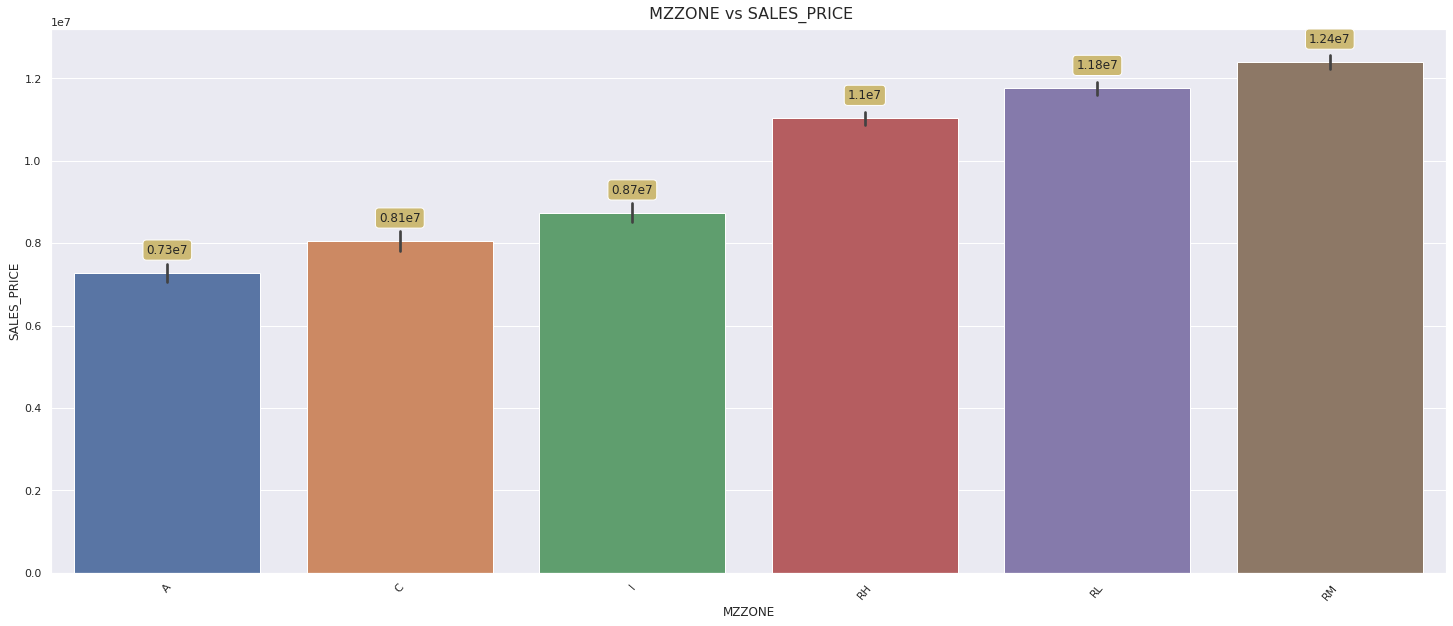

In [58]:
#chennai_city["MZZONE"]=chennai_city["MZZONE"].replace(['Pavd','NoAccess'],['Paved','No Access'])
sns.set(rc={"figure.figsize":(25,10)})
f1=sns.barplot(x='MZZONE',y="SALES_PRICE",data=chennai,order=chennai.groupby("MZZONE")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["MZZONE"])
for i in f1.patches: 
   f1.annotate(str(round(i.get_height()/10**7,2))+"e7",xy=(i.get_x()+i.get_width()/2,i.get_height()+0.4*10**6),ha='center',va='bottom',bbox=dict(boxstyle="round",fc="y"))
plt.xticks(rotation=50)
plt.title(" MZZONE vs SALES_PRICE",fontsize=16,va="bottom")
plt.show()

MZZONE has a linear relationship of the dataset.

3.**Checking whether the data is normally distributed in target variable**

**Normal Ditribution(Gaussian Distribution)**

Text(0.5, 1.0, 'Original Sale Price Histogram')

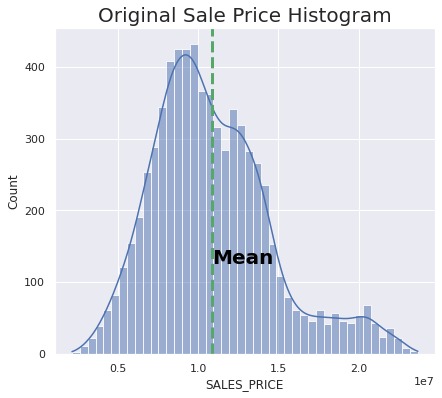

In [59]:
plt.figure(figsize = (15,6))
ax1 = plt.subplot(1,2,1)
sns.histplot(chennai['SALES_PRICE'],palette='Blues_r',kde=True)
plt.axvline(x=chennai['SALES_PRICE'].mean(), color='g', linestyle='--', linewidth=3)
plt.text(chennai['SALES_PRICE'].mean(), 125, "Mean", horizontalalignment='left', size=20, color='black', weight='semibold')
plt.title('Original Sale Price Histogram',fontsize=20)


**The Datas are right skewed so need LOG normal distribution**

In [60]:
mean = chennai['SALES_PRICE'].mean()
std = chennai['SALES_PRICE'].std()
skew = chennai['SALES_PRICE'].skew()
print('SalePrice : mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}'.format(mean, std, skew))

SalePrice : mean: 10888008.2164, std: 3769081.2979, skew: 0.7755


 Observation:

The skewness was about 0.7755. Also, since the metric is RMSLE, we will perform log scaling.

In [61]:
chennai['SALES_PRICE1'] = np.log(chennai['SALES_PRICE'])

In [62]:
chennai["REG_FEE"]=np.log(chennai["REG_FEE"])

In [63]:
chennai["COMMIS"]=np.log(chennai["COMMIS"])

4.**LOG Normal Distribution for target variable to reduce skewness in the data**

Original Sale Price Histogram

Text(0.5, 1.0, 'Original Sale Price Histogram')

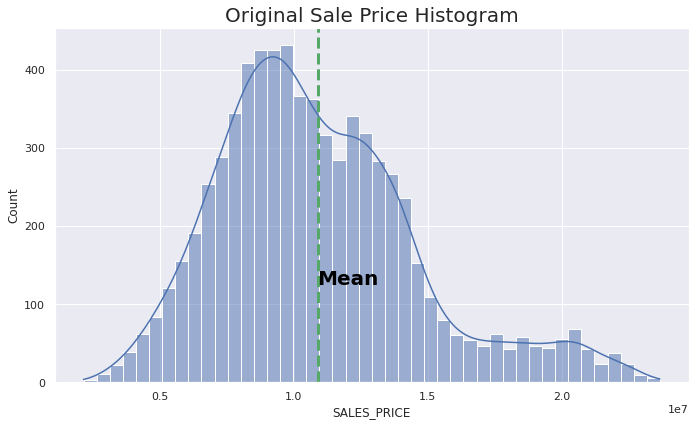

In [66]:
plt.figure(figsize = (25,15))
plt.subplots_adjust(hspace=0.3)
ax1 = plt.subplot(2,2,1)
sns.histplot(chennai['SALES_PRICE'],palette='Blues_r',kde=True)
plt.axvline(x=chennai['SALES_PRICE'].mean(), color='g', linestyle='--', linewidth=3)
plt.text(chennai['SALES_PRICE'].mean(), 125, "Mean", horizontalalignment='left', size=20, color='black', weight='semibold')
plt.title('Original Sale Price Histogram',fontsize=20)


Log transformed Sale Price Histogram

Text(0.5, 1.0, 'Log transformed Sale Price Histogram')

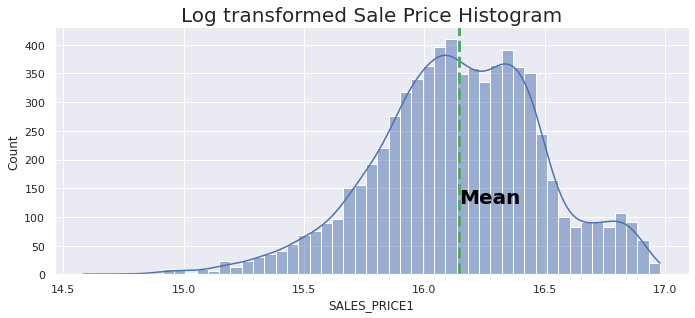

In [67]:
ax3 = plt.subplot(2,2,3)
sns.histplot(chennai['SALES_PRICE1'] ,palette='Blues_r',kde=True)
plt.axvline(x=chennai['SALES_PRICE1'].mean(), color='g', linestyle='--', linewidth=3)
plt.text(chennai['SALES_PRICE1'].mean(), 125, "Mean", horizontalalignment='left', size=20, color='black', weight='semibold')
plt.title('Log transformed Sale Price Histogram',fontsize=20)

In [69]:
mean=chennai["SALES_PRICE1"].mean()
std=chennai["SALES_PRICE1"].std()
skew=chennai["SALES_PRICE1"].skew()
print("SalesPrice: Mean:{0:.4f},\nstd:{1:.4f},\nSkew :{2:.4f}".format(mean,std,skew))

SalesPrice: Mean:16.1434,
std:0.3508,
Skew :-0.2717


Skewness is improved and no big skew in the current log standards.

As the SALES_PRICE1 feature improves skewness SALES_PRICE feature should be removed.

In [70]:
chennai=chennai.drop(columns=['SALES_PRICE'],axis=0)

5.**Spearsman's rank correlation for linear relationship findings**

In [72]:
co=chennai.corr().round(1)
co

INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
INT_SQFT            1.0            0.0        0.8         0.5     1.0   
DIST_MAINROAD       0.0            1.0       -0.0         0.0     0.0   
N_BEDROOM           0.8           -0.0        1.0         0.8     0.8   
N_BATHROOM          0.5            0.0        0.8         1.0     0.6   
N_ROOM              1.0            0.0        0.8         0.6     1.0   
QS_ROOMS            0.0            0.0        0.0         0.0     0.0   
QS_BATHROOM        -0.0           -0.0       -0.0        -0.0    -0.0   
QS_BEDROOM          0.0            0.0        0.0         0.0     0.0   
QS_OVERALL          0.0           -0.0        0.0         0.0     0.0   
REG_FEE             0.7            0.0        0.5         0.3     0.7   
COMMIS              0.6            0.0        0.4         0.2     0.5   
Yearsold           -0.1            0.0       -0.2        -0.1    -0.1   
Yearbuild          -0.0            0.0        0.0         0.0     0.0   
Houselife          -0.0           -0.0       -0.0        -0.0    -0.0   
SALES_PRICE1        0.6            0.0        0.4         0.1     0.6   

               QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  \
INT_SQFT            0.0         -0.0         0.0         0.0      0.7     0.6   
DIST_MAINROAD       0.0         -0.0         0.0        -0.0      0.0     0.0   
N_BEDROOM           0.0         -0.0         0.0         0.0      0.5     0.4   
N_BATHROOM          0.0         -0.0         0.0         0.0      0.3     0.2   
N_ROOM              0.0         -0.0         0.0         0.0      0.7     0.5   
QS_ROOMS            1.0          0.0         0.0         0.5      0.0     0.0   
QS_BATHROOM         0.0          1.0        -0.0         0.6     -0.0     0.0   
QS_BEDROOM          0.0         -0.0         1.0         0.6      0.0     0.0   
QS_OVERALL          0.5          0.6         0.6         1.0      0.0     0.0   
REG_FEE             0.0         -0.0         0.0         0.0      1.0     0.6   
COMMIS              0.0          0.0         0.0         0.0      0.6     1.0   
Yearsold            0.0          0.0         0.0         0.0     -0.0     0.0   
Yearbuild          -0.0         -0.0         0.0        -0.0      0.1     0.1   
Houselife           0.0          0.0        -0.0         0.0     -0.1    -0.1   
SALES_PRICE1        0.0         -0.0         0.0         0.0      0.9     0.5   

               Yearsold  Yearbuild  Houselife  SALES_PRICE1  
INT_SQFT           -0.1       -0.0       -0.0           0.6  
DIST_MAINROAD       0.0        0.0       -0.0           0.0  
N_BEDROOM          -0.2        0.0       -0.0           0.4  
N_BATHROOM         -0.1        0.0       -0.0           0.1  
N_ROOM             -0.1        0.0       -0.0           0.6  
QS_ROOMS            0.0       -0.0        0.0           0.0  
QS_BATHROOM         0.0       -0.0        0.0          -0.0  
QS_BEDROOM          0.0        0.0       -0.0           0.0  
QS_OVERALL          0.0       -0.0        0.0           0.0  
REG_FEE            -0.0        0.1       -0.1           0.9  
COMMIS              0.0        0.1       -0.1           0.5  
Yearsold            1.0        0.2       -0.1          -0.0  
Yearbuild           0.2        1.0       -1.0           0.1  
Houselife          -0.1       -1.0        1.0          -0.1  
SALES_PRICE1       -0.0        0.1       -0.1           1.0

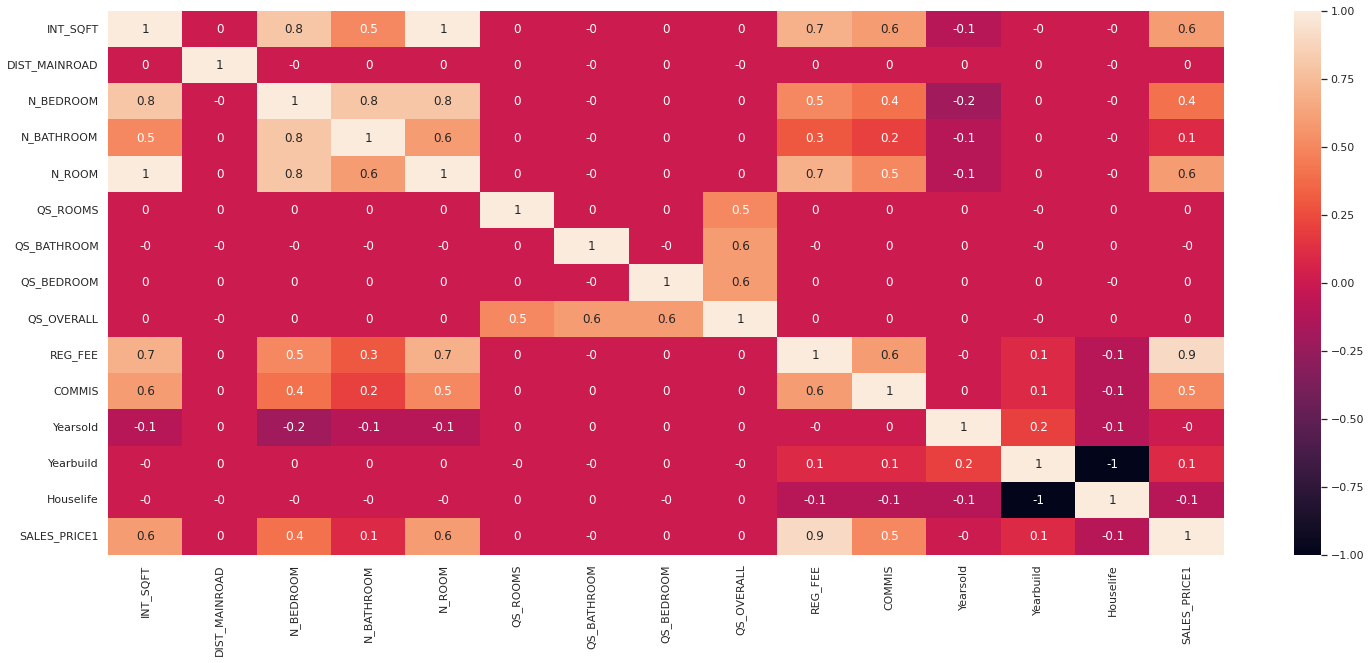

In [73]:
sns.heatmap(co,annot=True)

SalePrice is highly corelated with 'NROOMS', 
 'INTSQFT',"N_BEDROOM
*   Here 'COMMIS', 'REG_FEE','NROOMS' and 'INTSQFT' are highly correlated.

Either we can delete one feature.


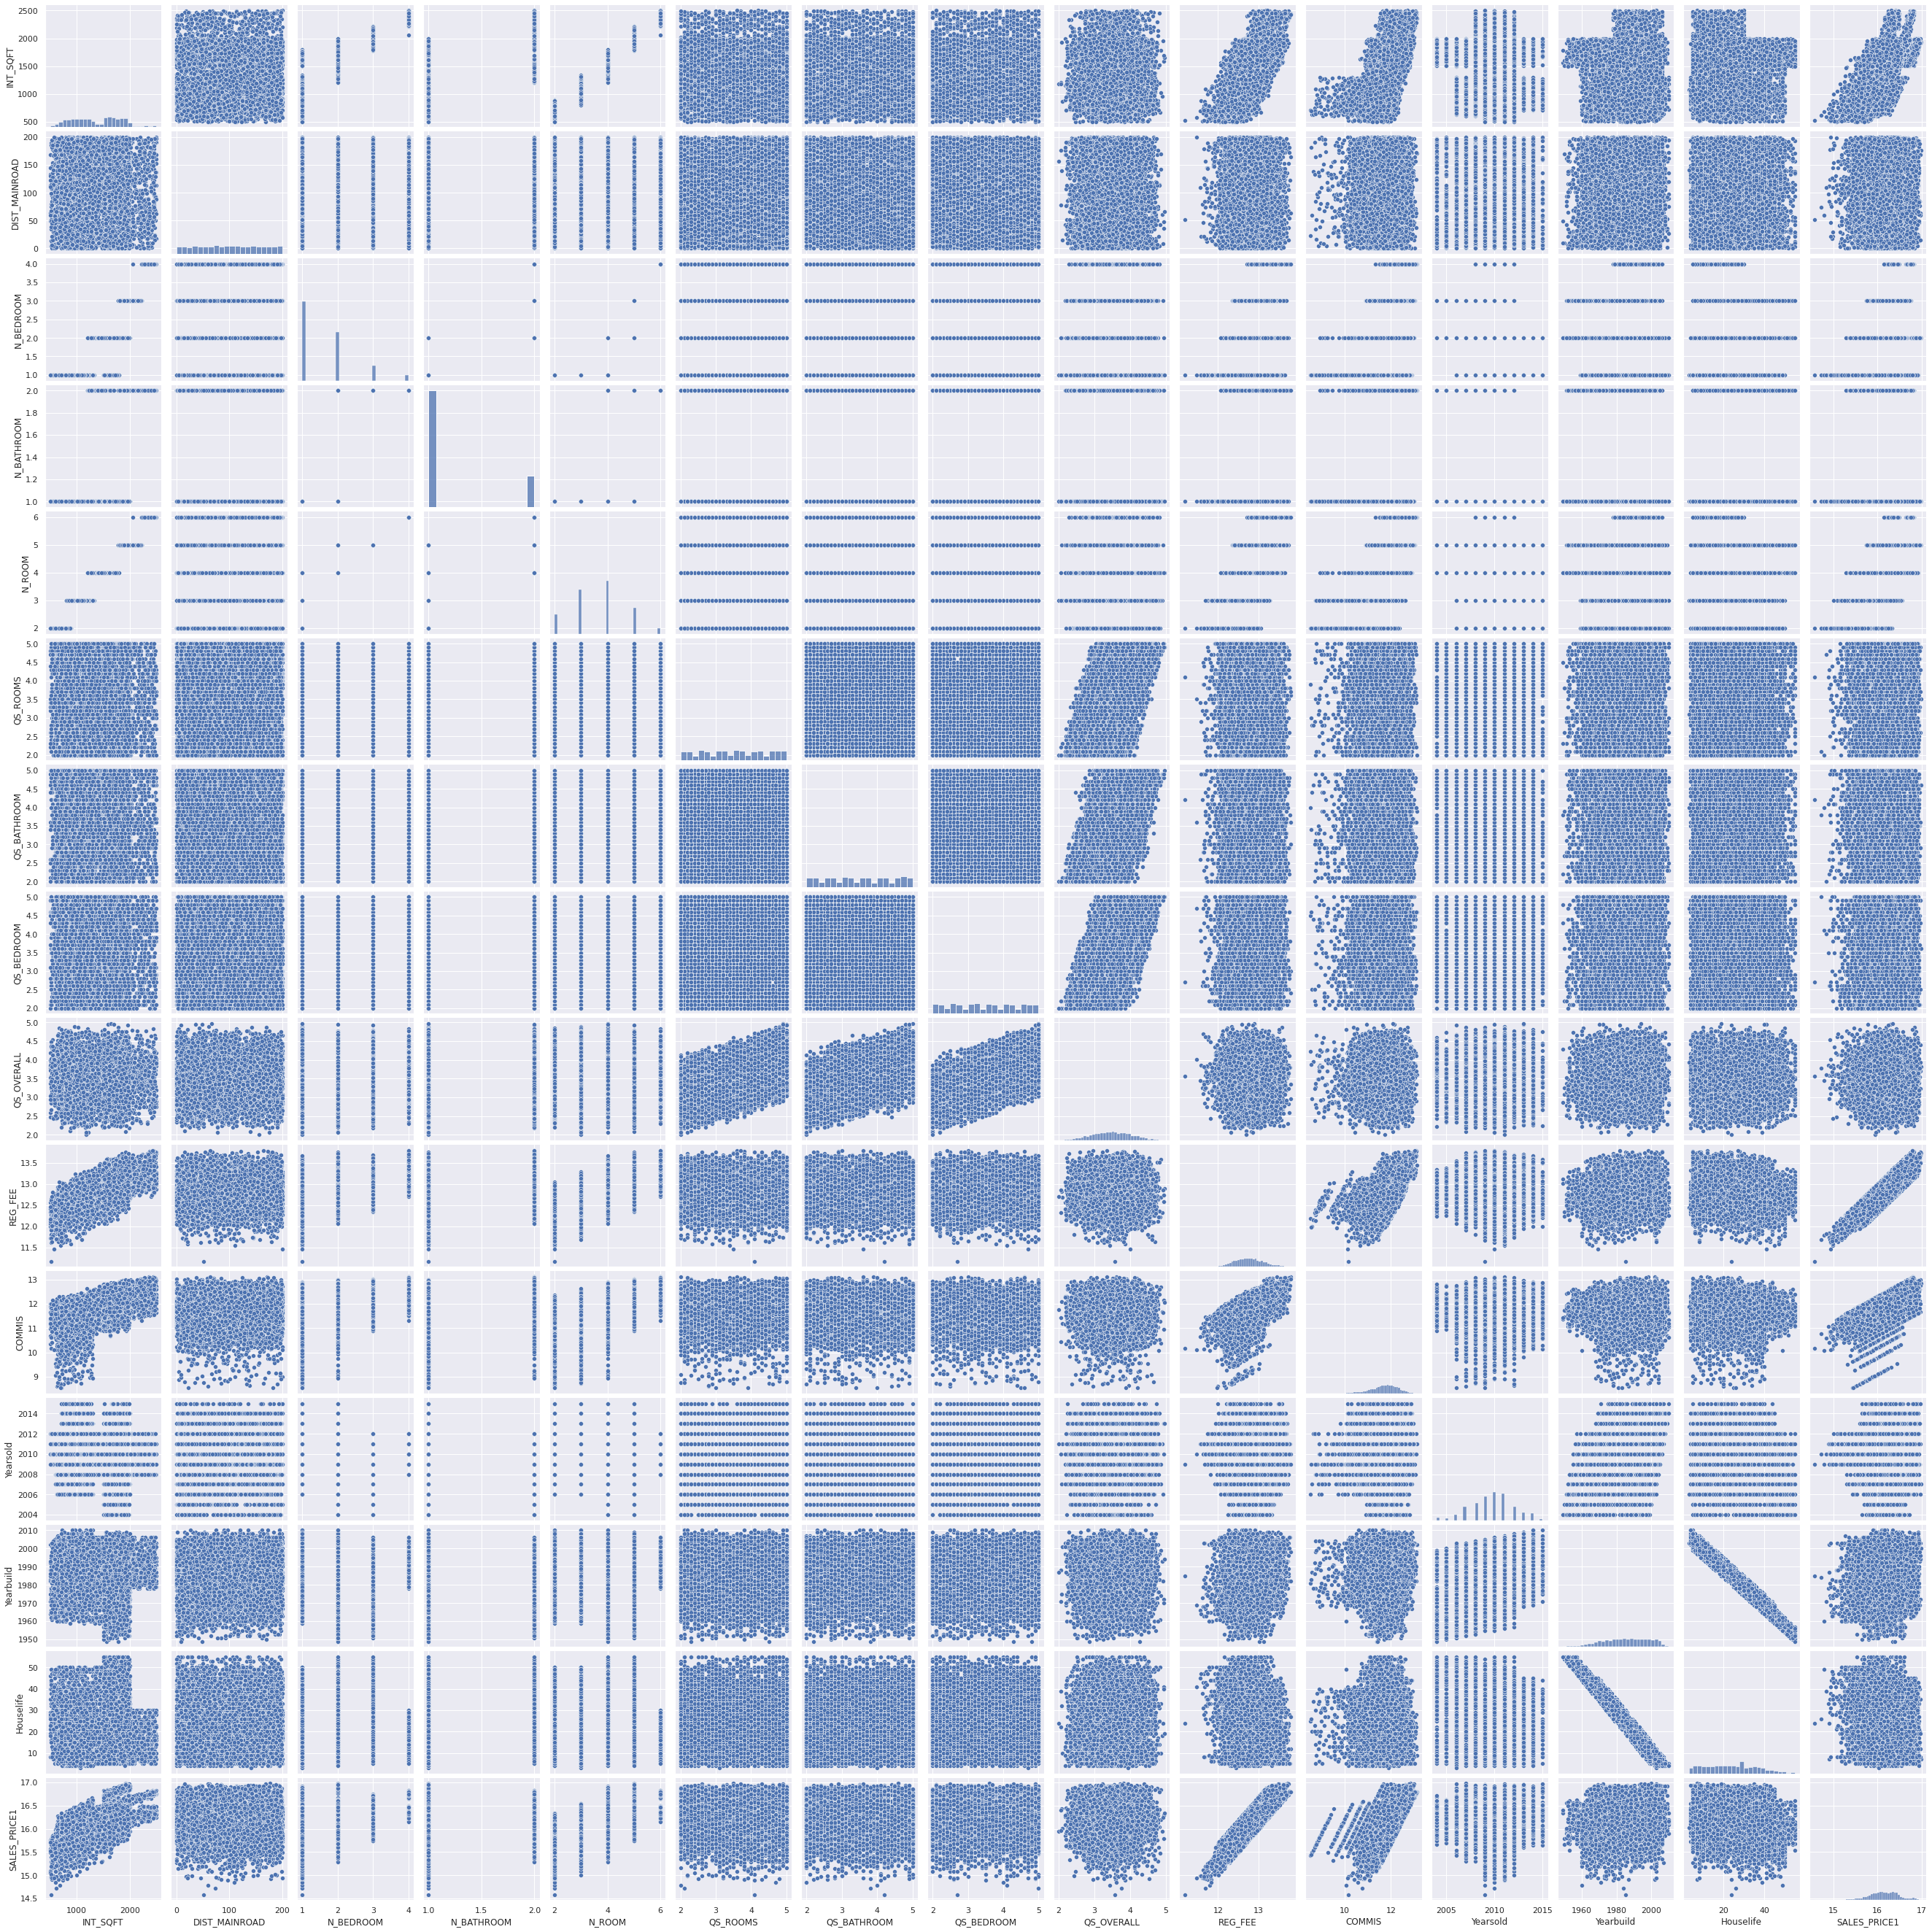

In [75]:
sns.pairplot(chennai,kind='scatter')

6.**Seperating the numerical values**

In [76]:
# list of numerical variables
numerical_features = [feature for feature in chennai.columns if chennai[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
numerical_features=chennai[numerical_features]
numerical_features

Number of numerical variables:  15


INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  QS_ROOMS  \
0         1004            131        1.0         1.0       3       4.0   
1         1986             26        2.0         1.0       5       4.9   
2          909             70        1.0         1.0       3       4.1   
3         1855             14        3.0         2.0       5       4.7   
4         1226             84        1.0         1.0       3       3.0   
...        ...            ...        ...         ...     ...       ...   
7104       598             51        1.0         1.0       2       3.0   
7105      1897             52        3.0         2.0       5       3.6   
7106      1614            152        2.0         1.0       4       4.3   
7107       787             40        1.0         1.0       2       4.6   
7108      1896            156        3.0         2.0       5       3.1   

      QS_BATHROOM  QS_BEDROOM  QS_OVERALL    REG_FEE     COMMIS  Yearsold  \
0             3.9         4.9       4.330  12.847927  11.880343      2011   
1             4.2         2.5       3.765  13.541234  12.624944      2006   
2             3.8         2.2       3.090  12.950611  11.430782      2012   
3             3.9         3.6       4.010  12.783587  11.252106      2010   
4             2.5         4.1       3.290  12.375815  11.212671      2009   
...           ...         ...         ...        ...        ...       ...   
7104          2.2         2.4       2.520  12.248974  11.581145      2011   
7105          4.5         3.3       3.920  12.754746  12.233449      2004   
7106          4.2         2.9       3.840  12.667773  12.025917      2006   
7107          3.8         4.1       4.160  12.960668  11.687702      2009   
7108          3.5         4.3       3.640  12.763334  11.287429      2005   

      Yearbuild  Houselife  SALES_PRICE1  
0          1967         44     15.843659  
1          1995         11     16.893641  
2          1992         20     16.392632  
3          1988         22     16.080424  
4          1979         30     15.817835  
...         ...        ...           ...  
7104       1962         49     15.493168  
7105       1995          9     16.196766  
7106       1978         28     15.937941  
7107       1977         32     15.956400  
7108       1961         44     16.115741  

[7056 rows x 15 columns]

**7.Sepearting the discrete features**

In [77]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(chennai[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 4


In [78]:
discrete_feature

['N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'Yearsold']

**8.discrete feaures vs salesprice**

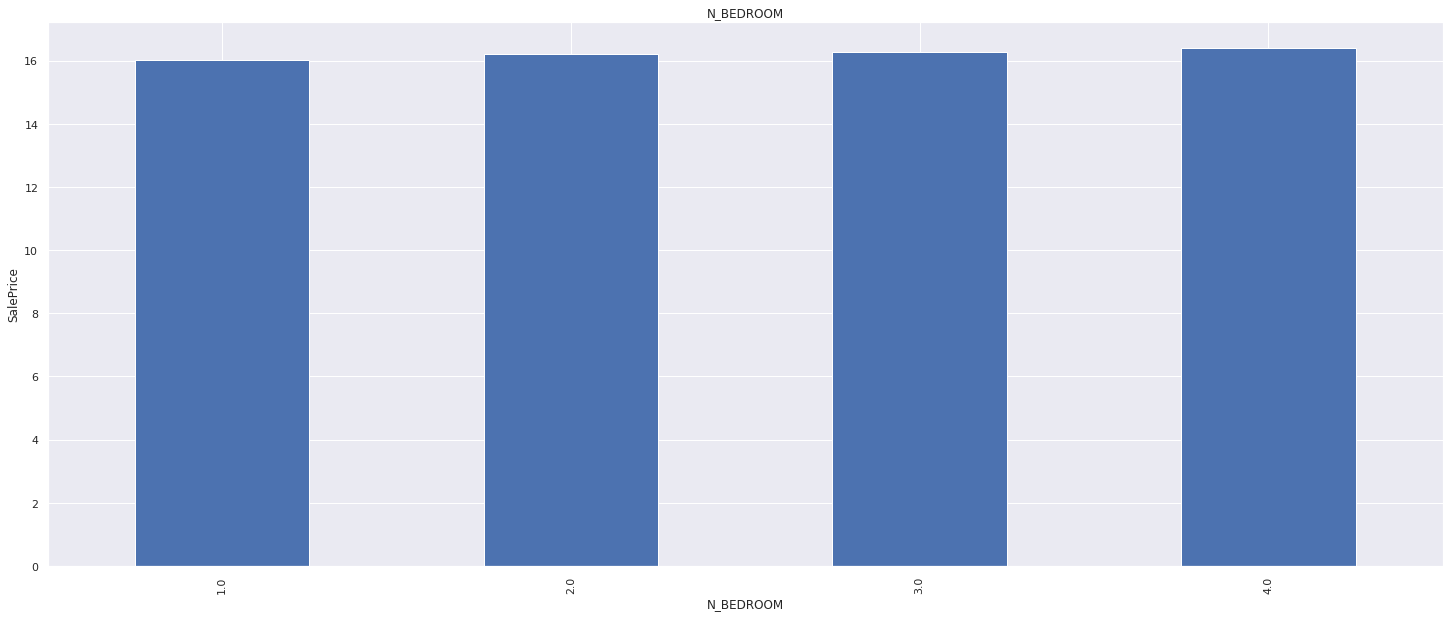

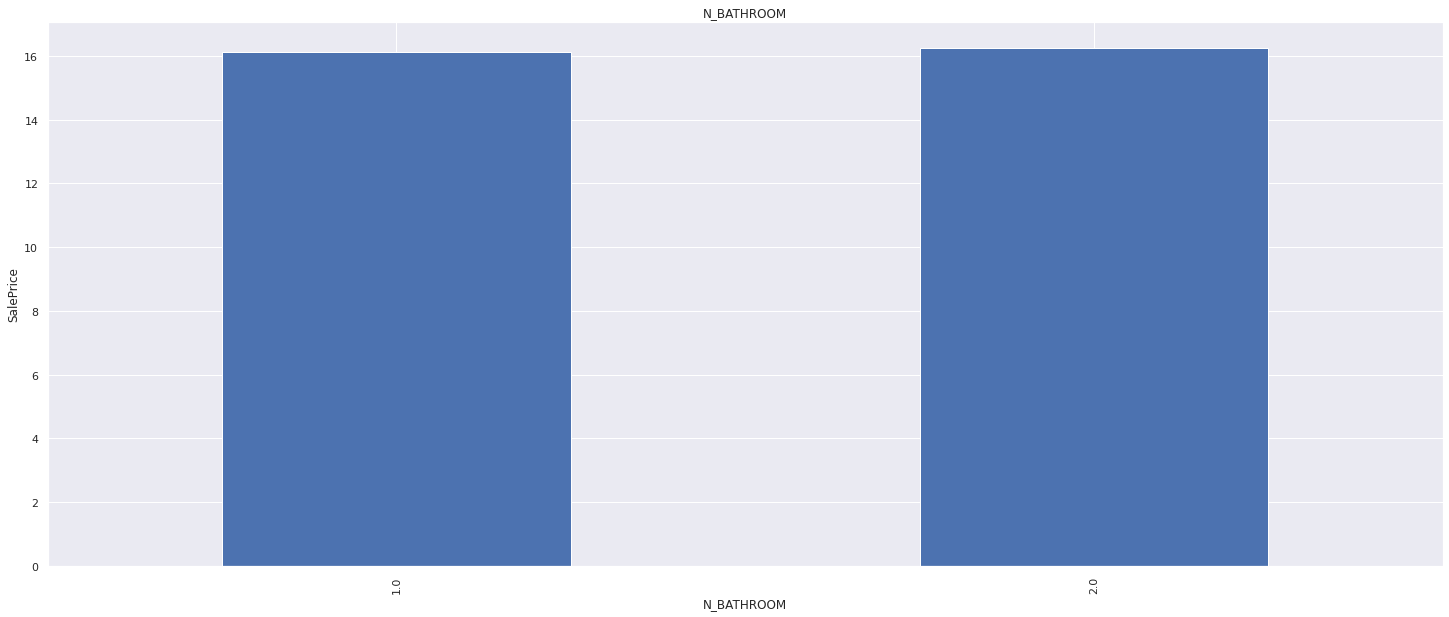

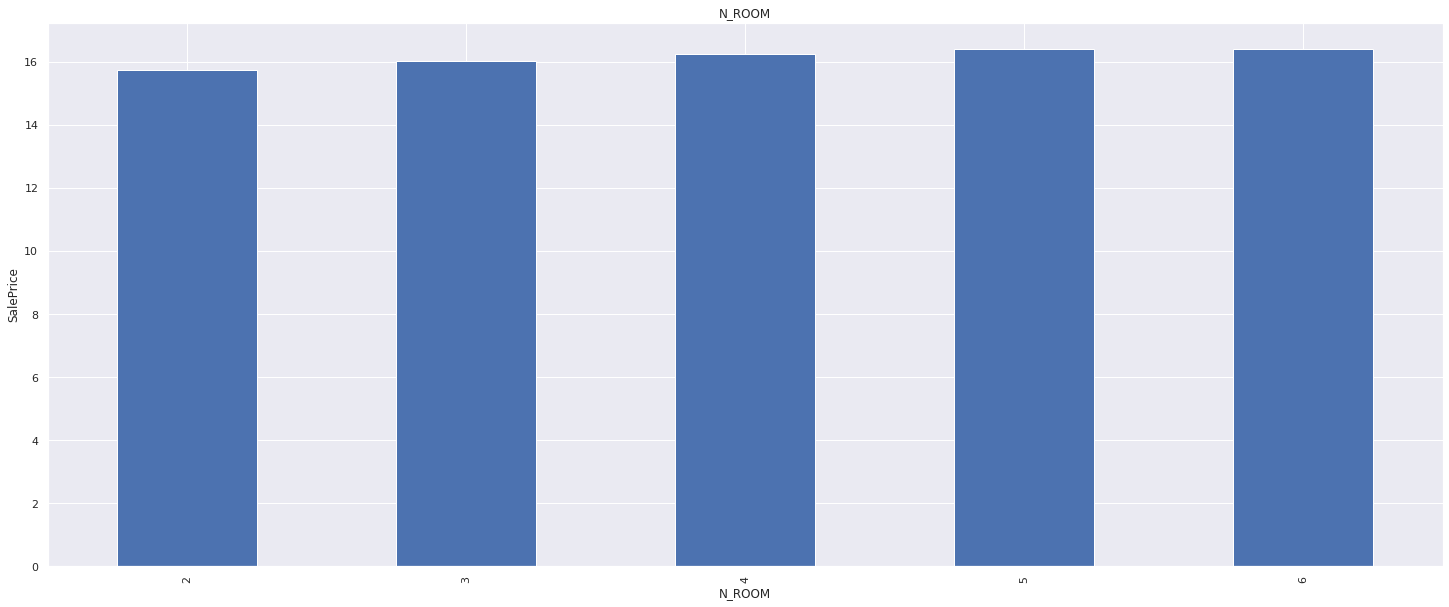

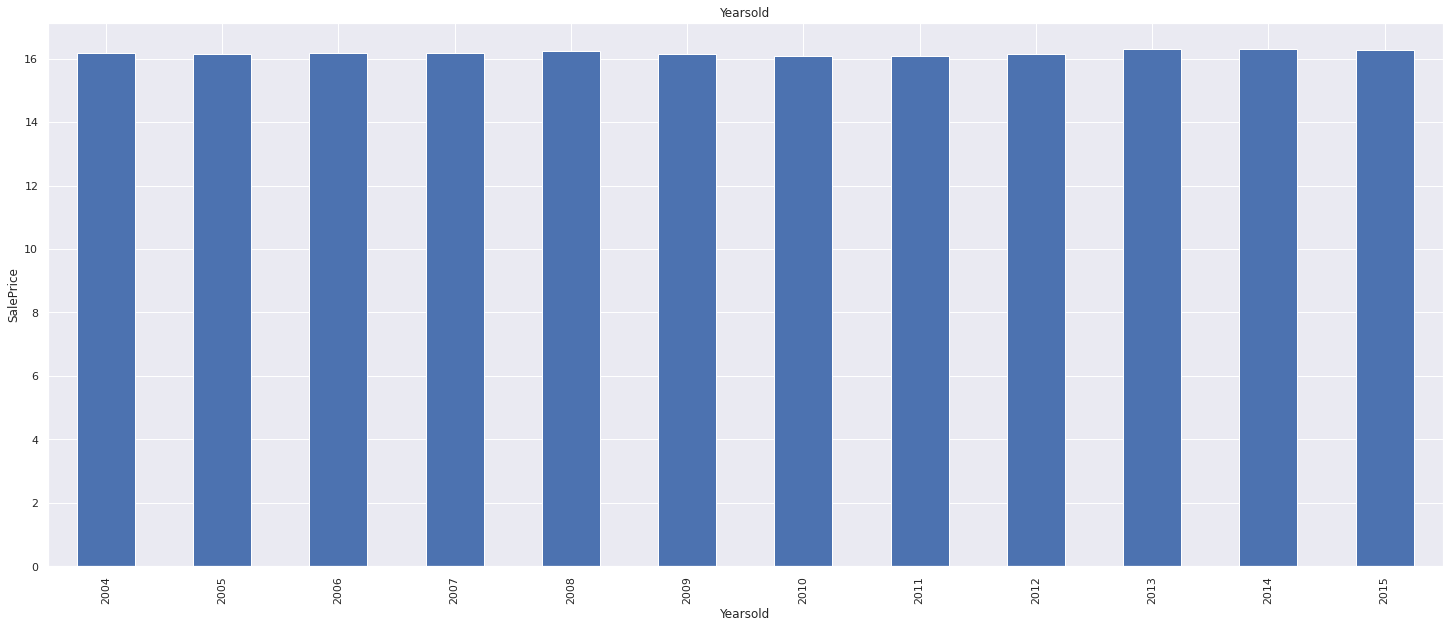

In [79]:
for feature in discrete_feature:
    chennai=chennai.copy()
    chennai.groupby(feature)['SALES_PRICE1'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Variables are equally distributed in all the cases.

9.**Sepearting the continuous features**

In [81]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count: {}".format(len(continuous_feature)))

Continuous feature Count: 11


In [82]:
continuous_feature

['INT_SQFT',
 'DIST_MAINROAD',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'REG_FEE',
 'COMMIS',
 'Yearbuild',
 'Houselife',
 'SALES_PRICE1']

10.**histogram plot to identify frequencies for continuous_feature vs salesprice**

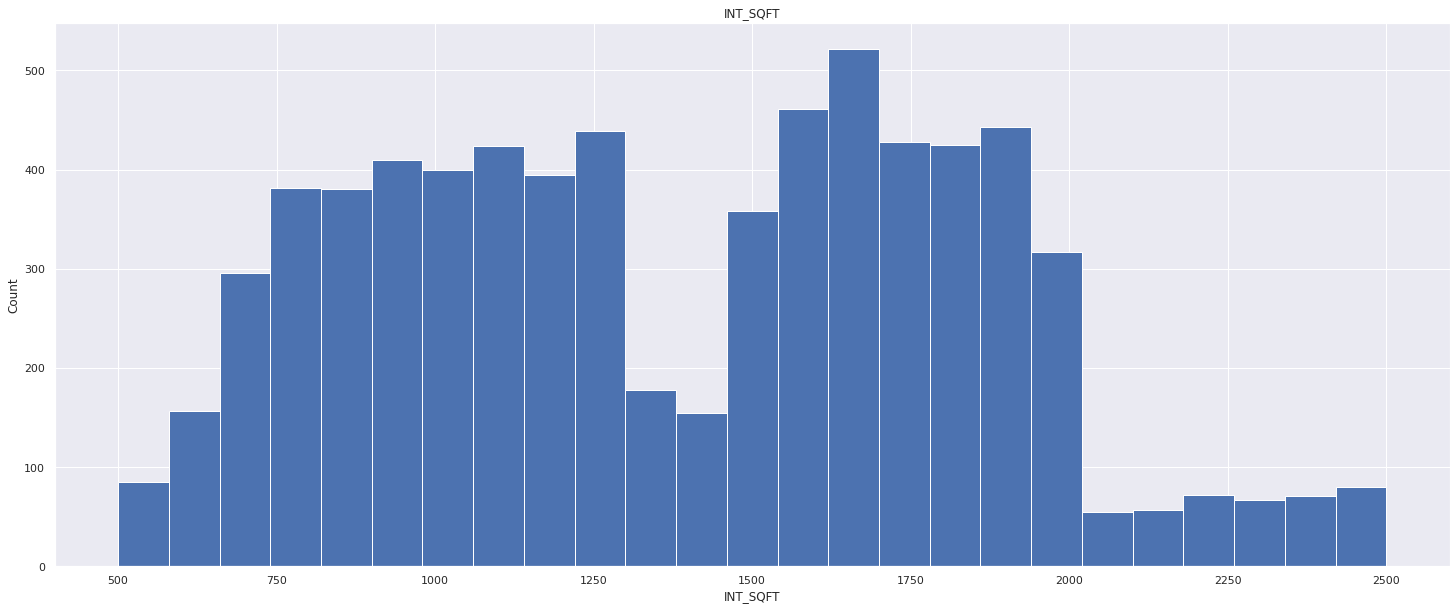

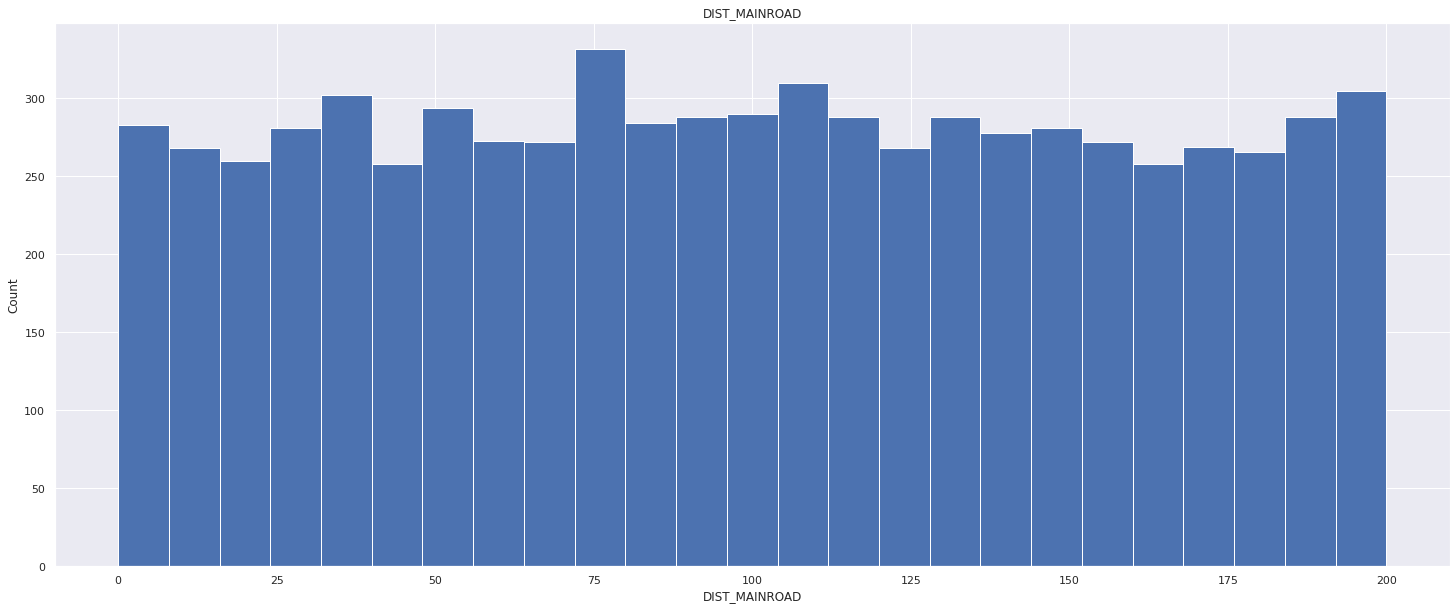

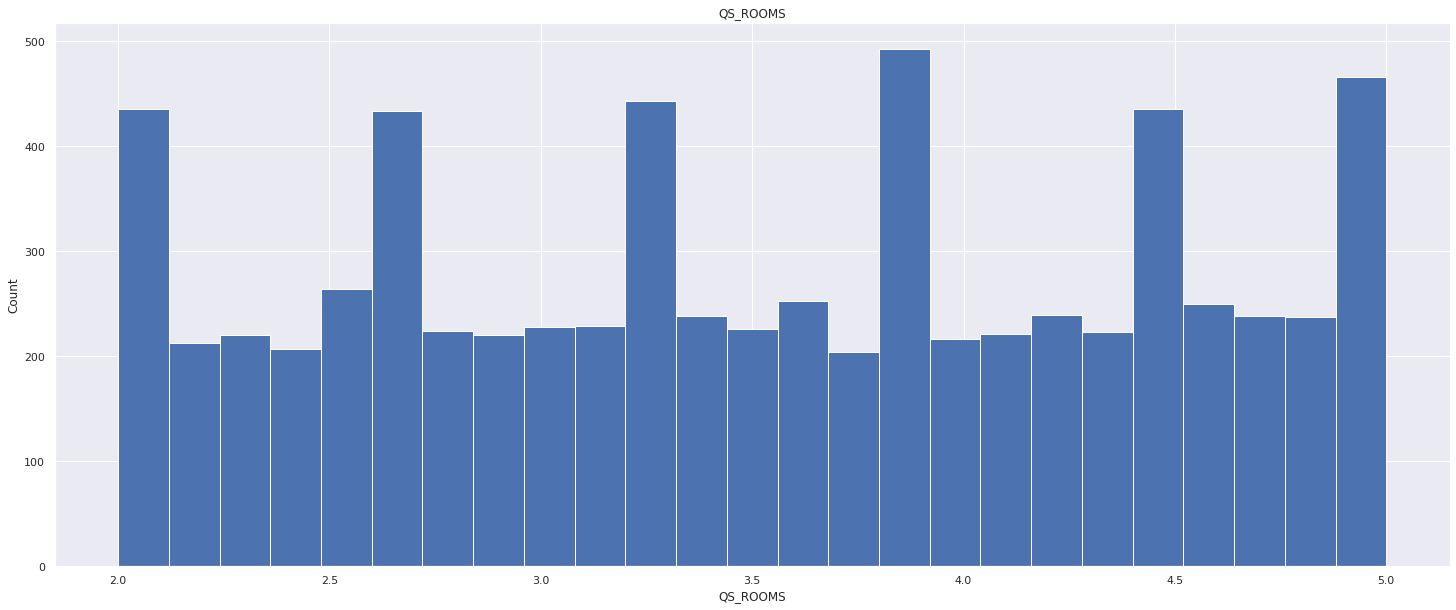

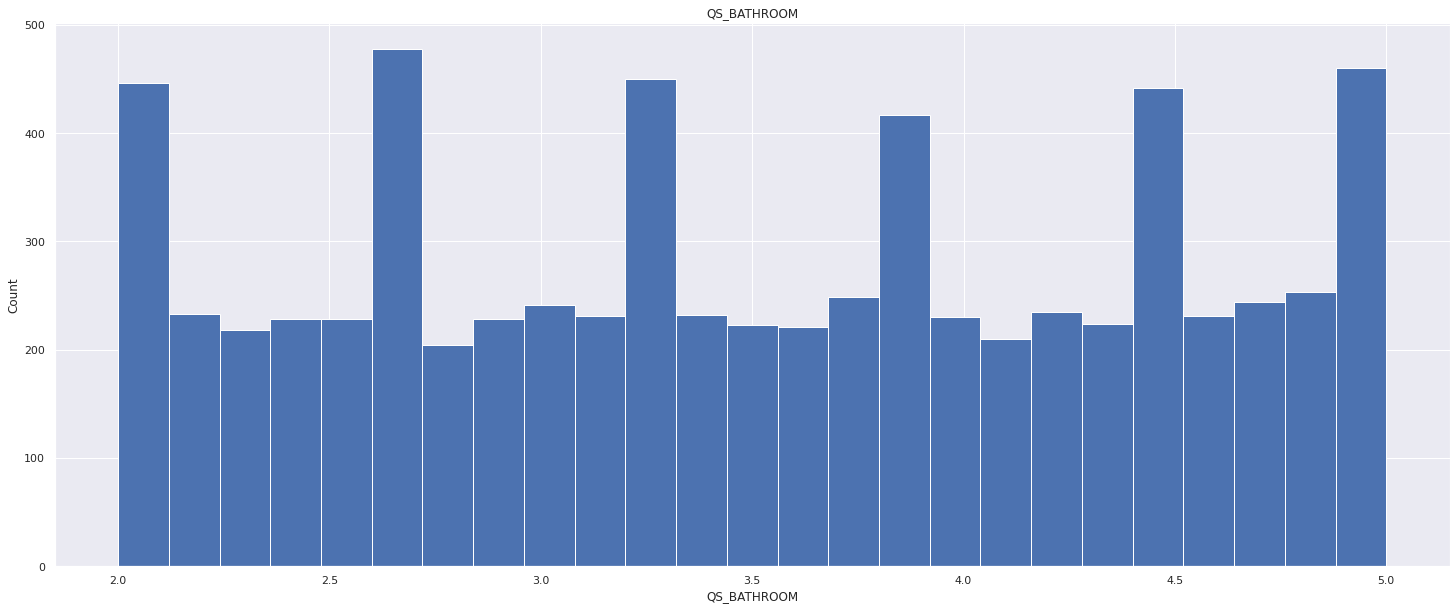

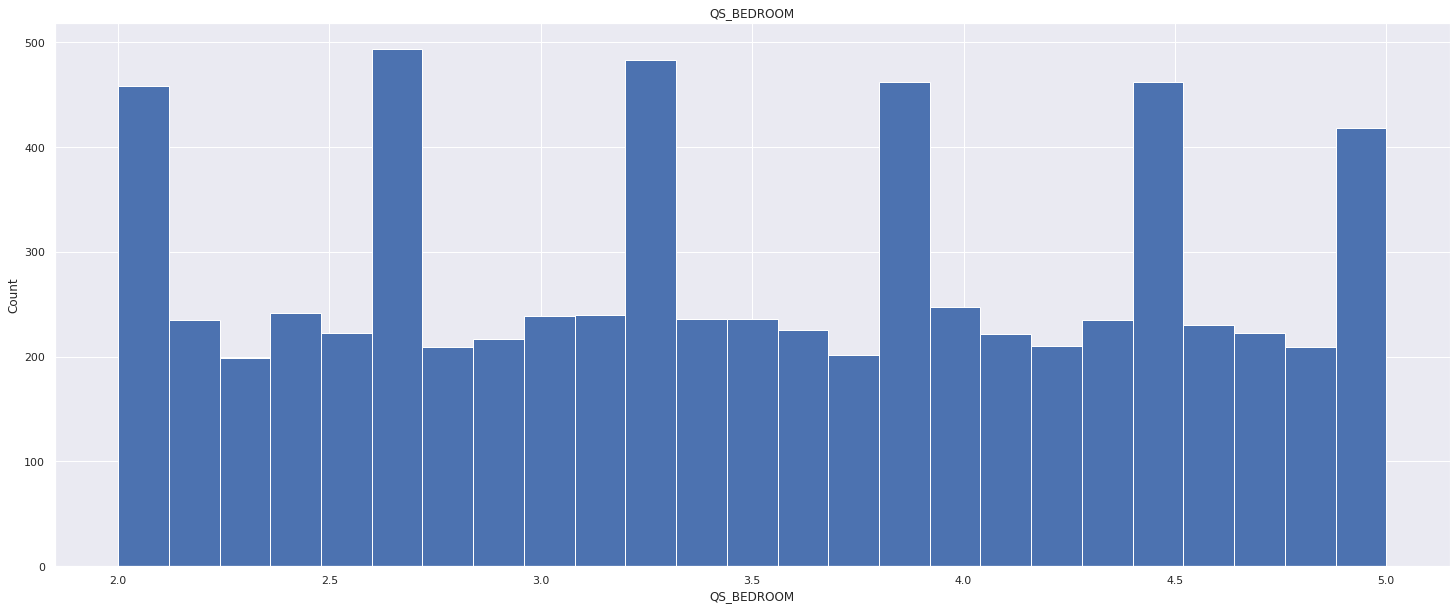

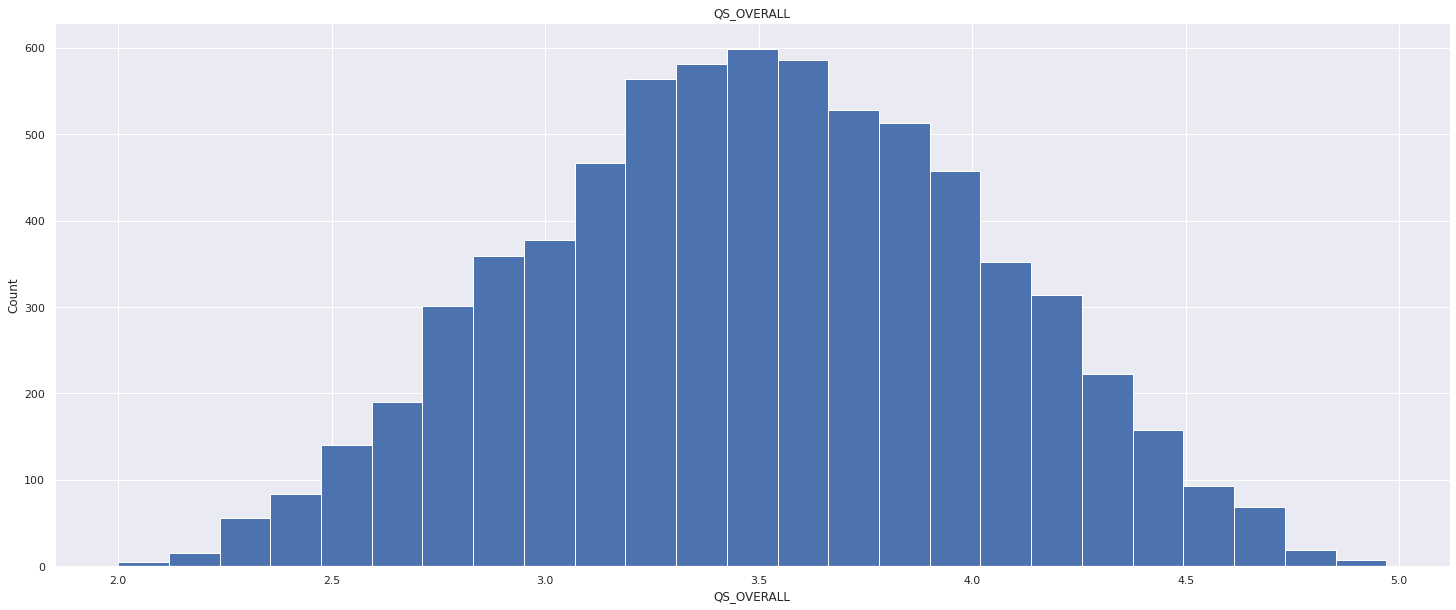

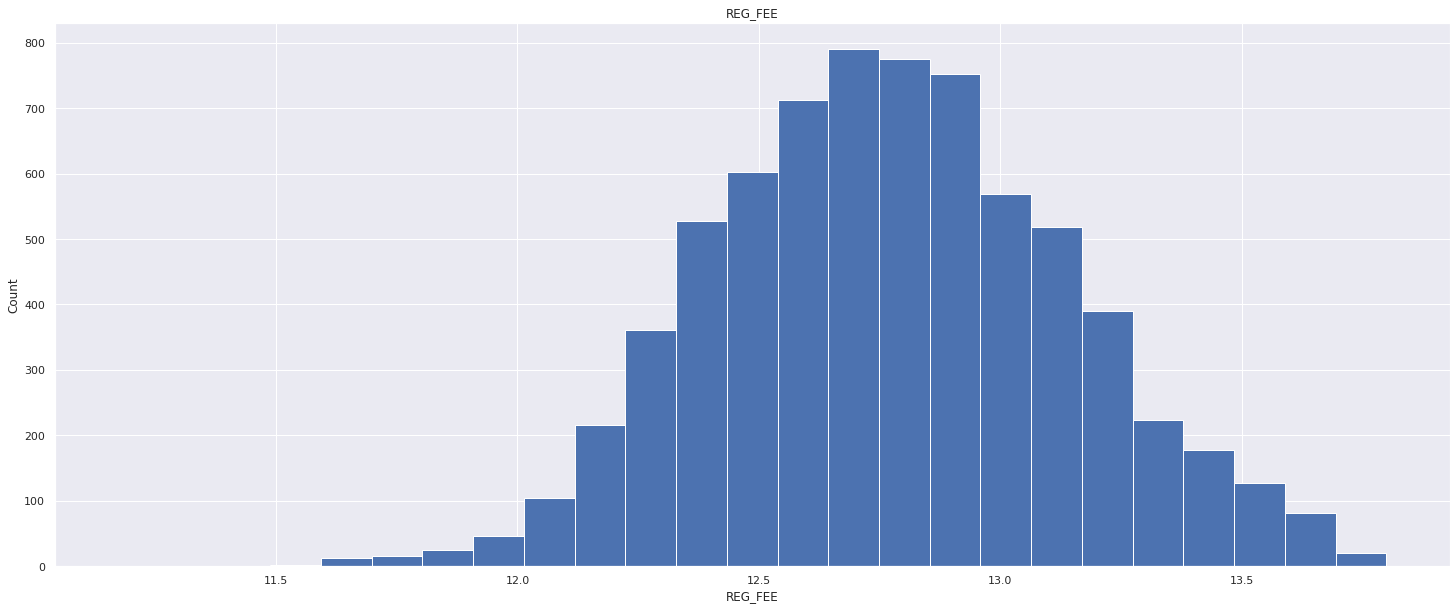

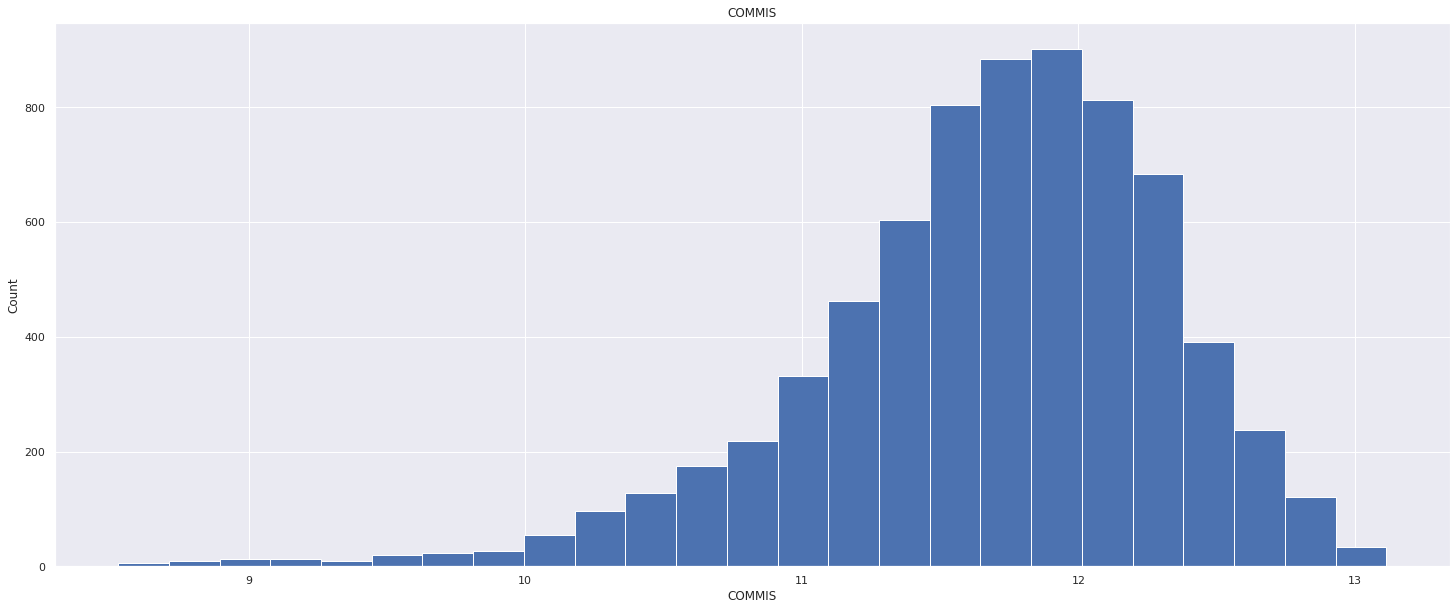

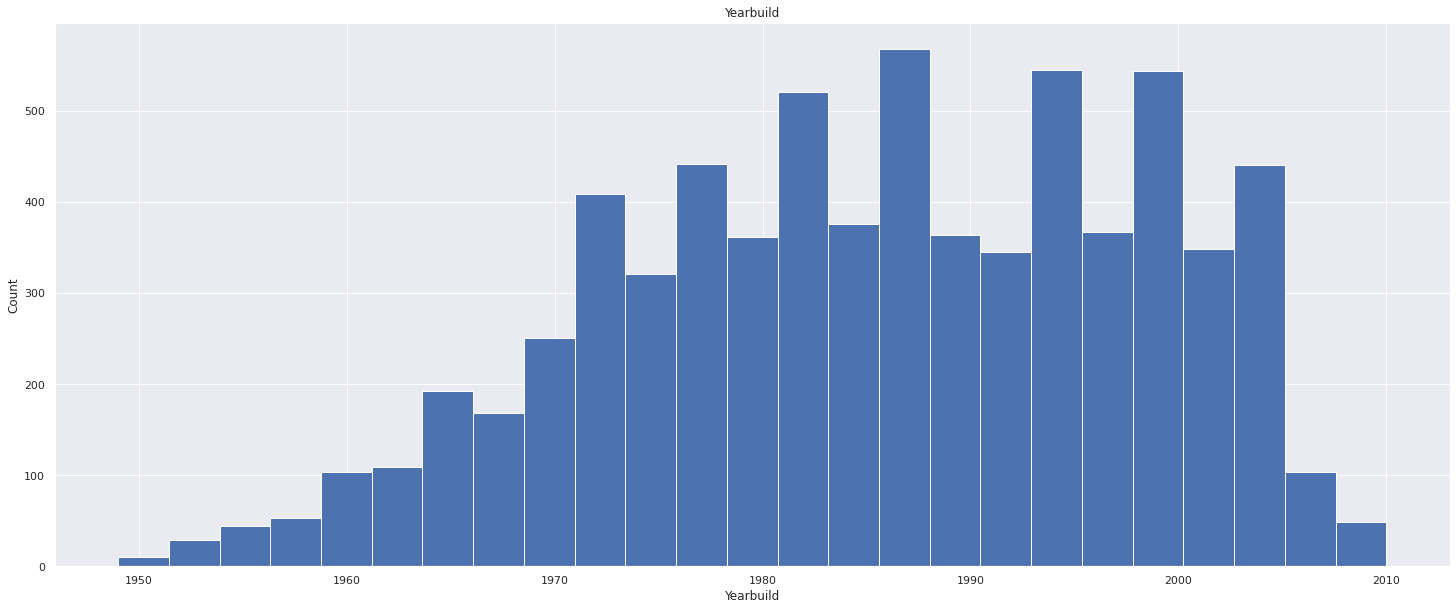

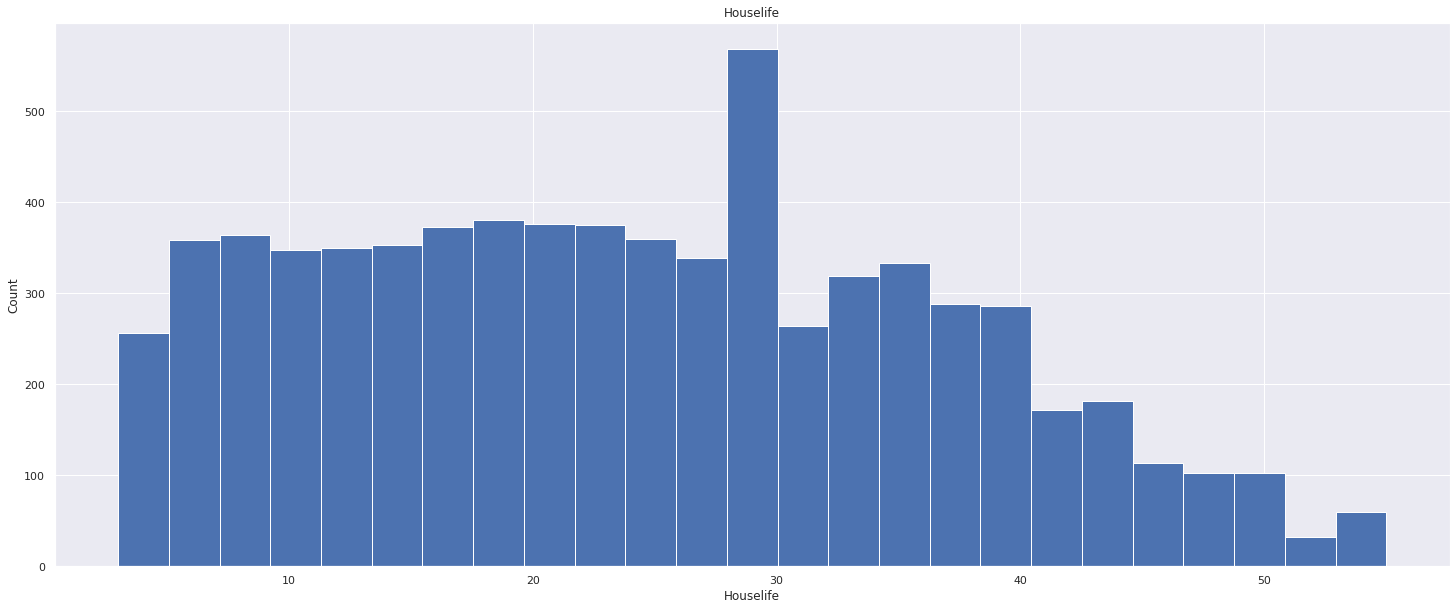

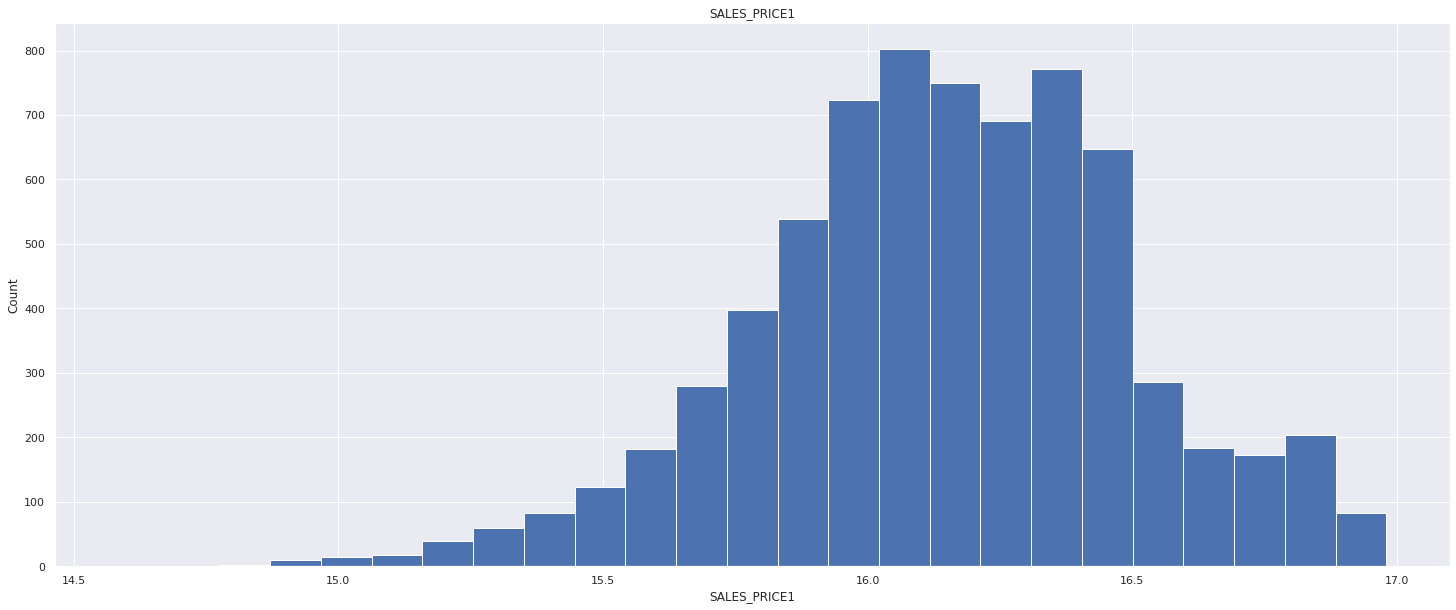

In [84]:
for feature in continuous_feature:
    data=chennai.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

11.**Scatter plot to find linear relationship for continuous_feature vs salesprice**

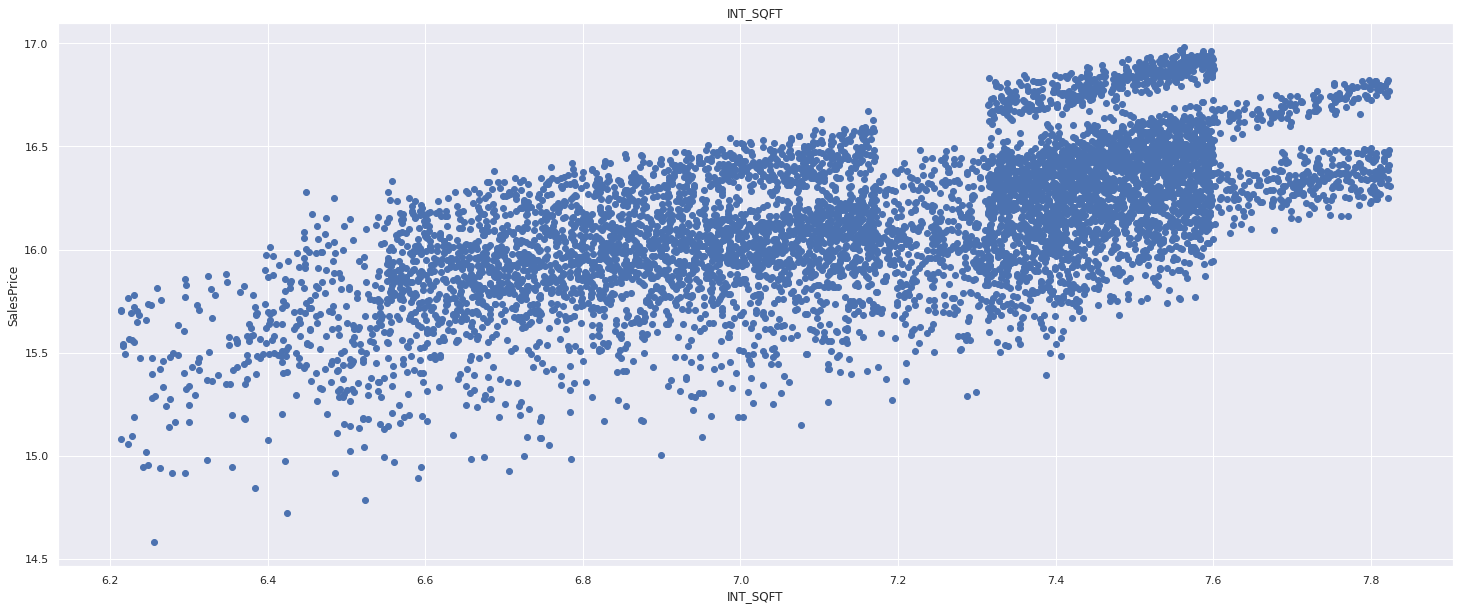

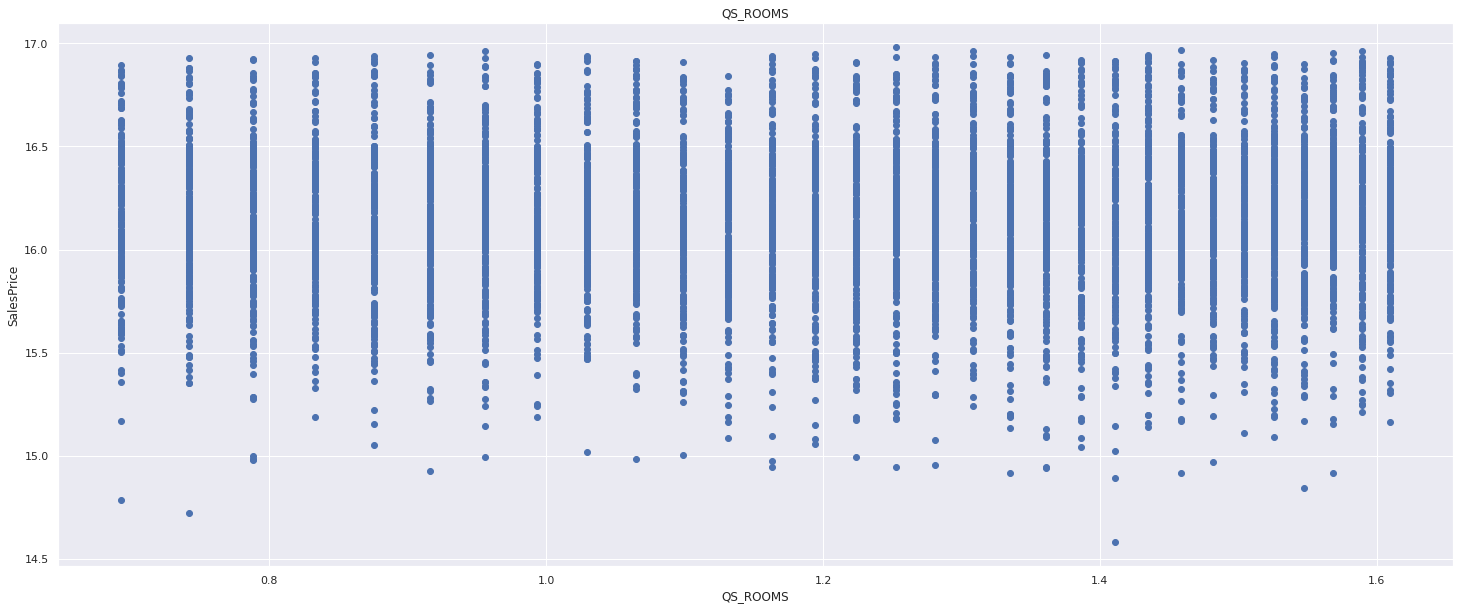

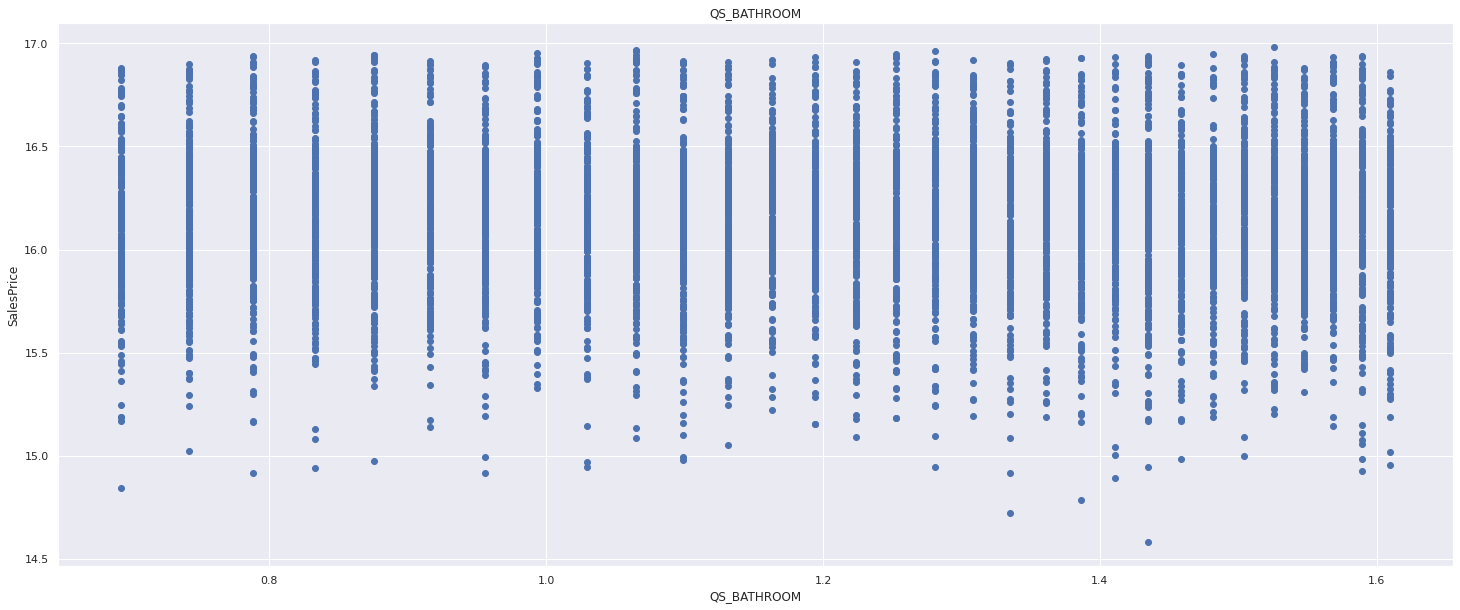

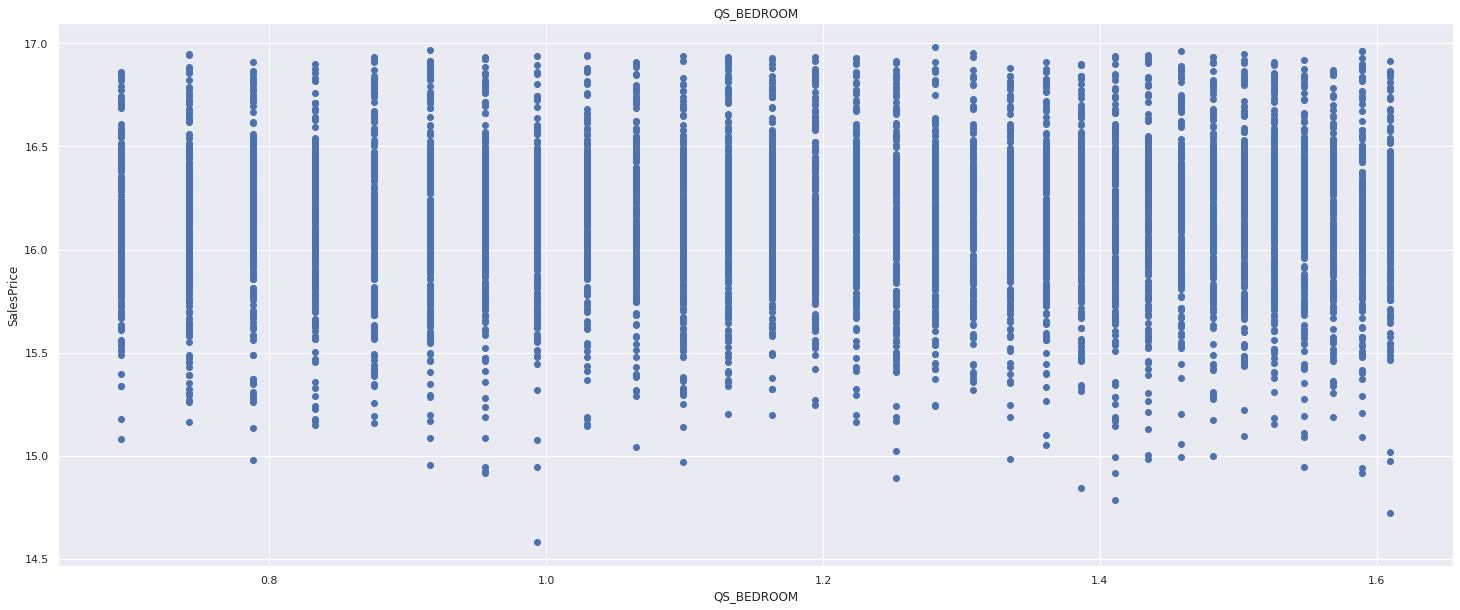

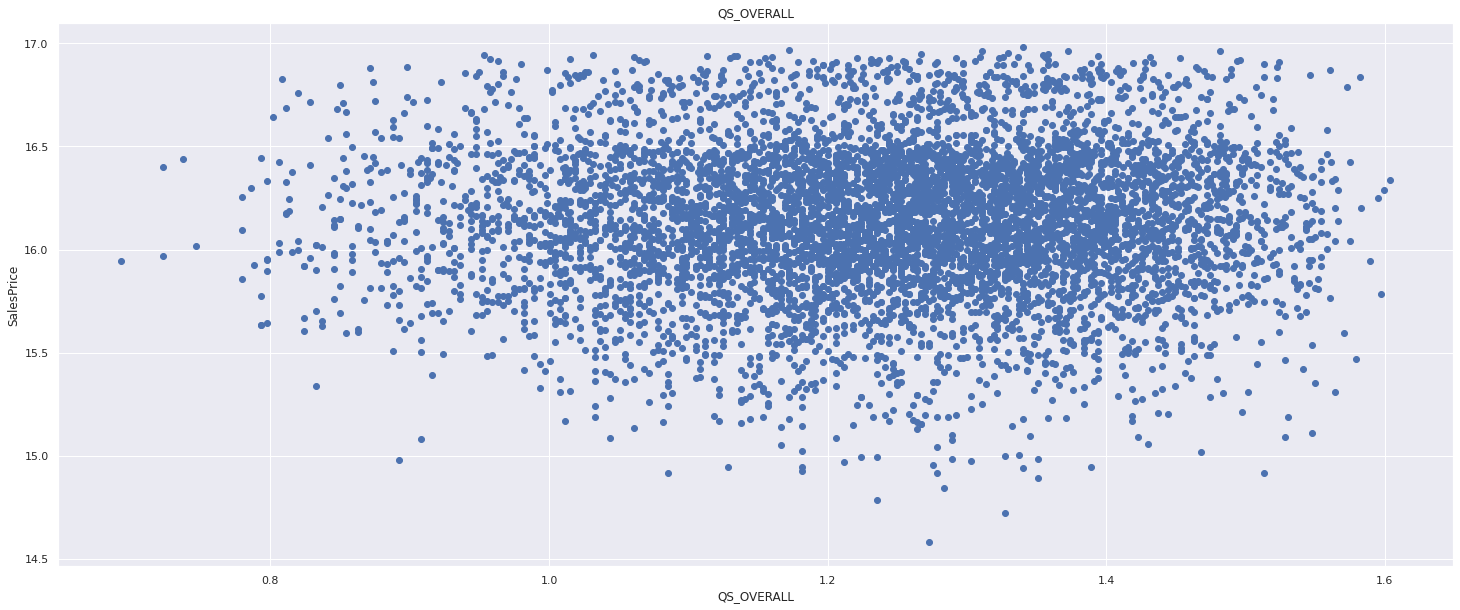

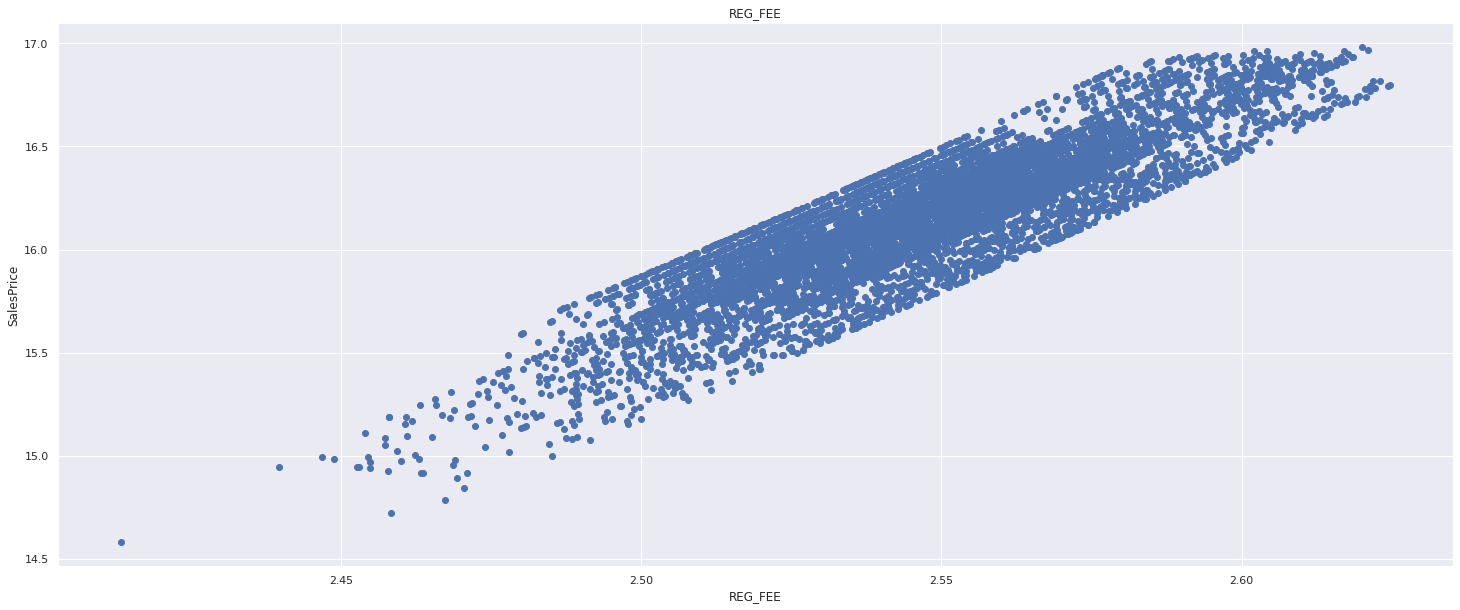

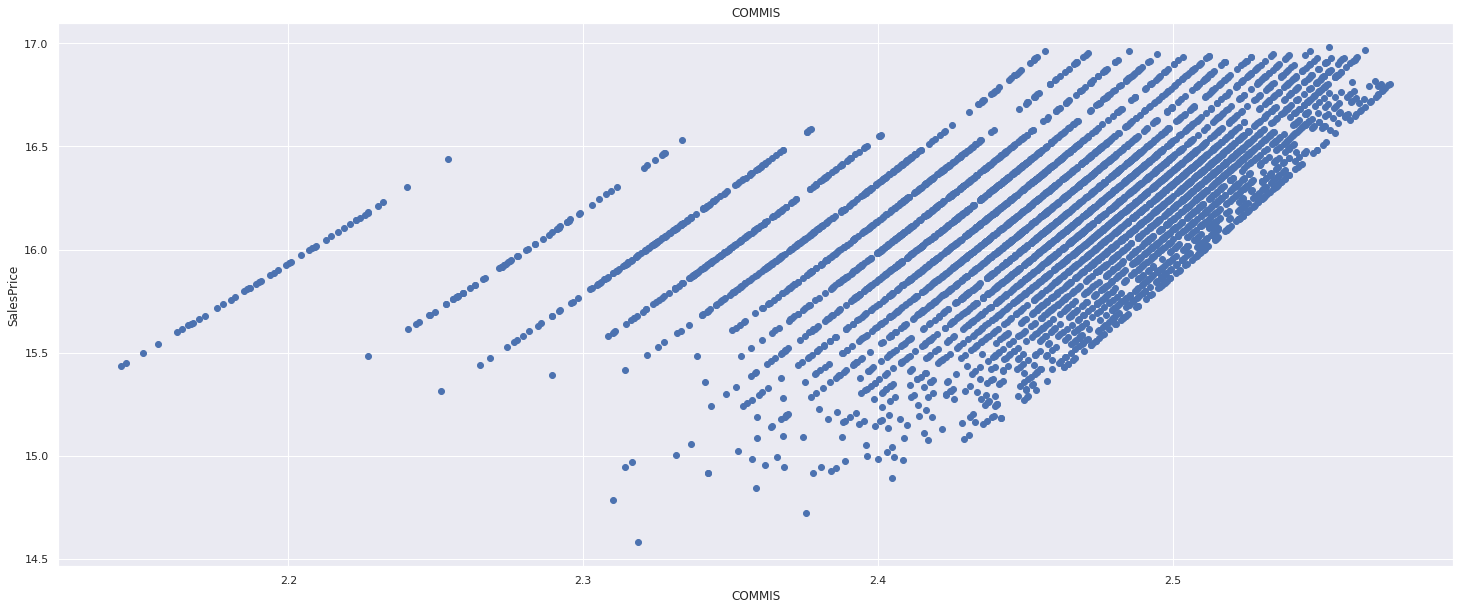

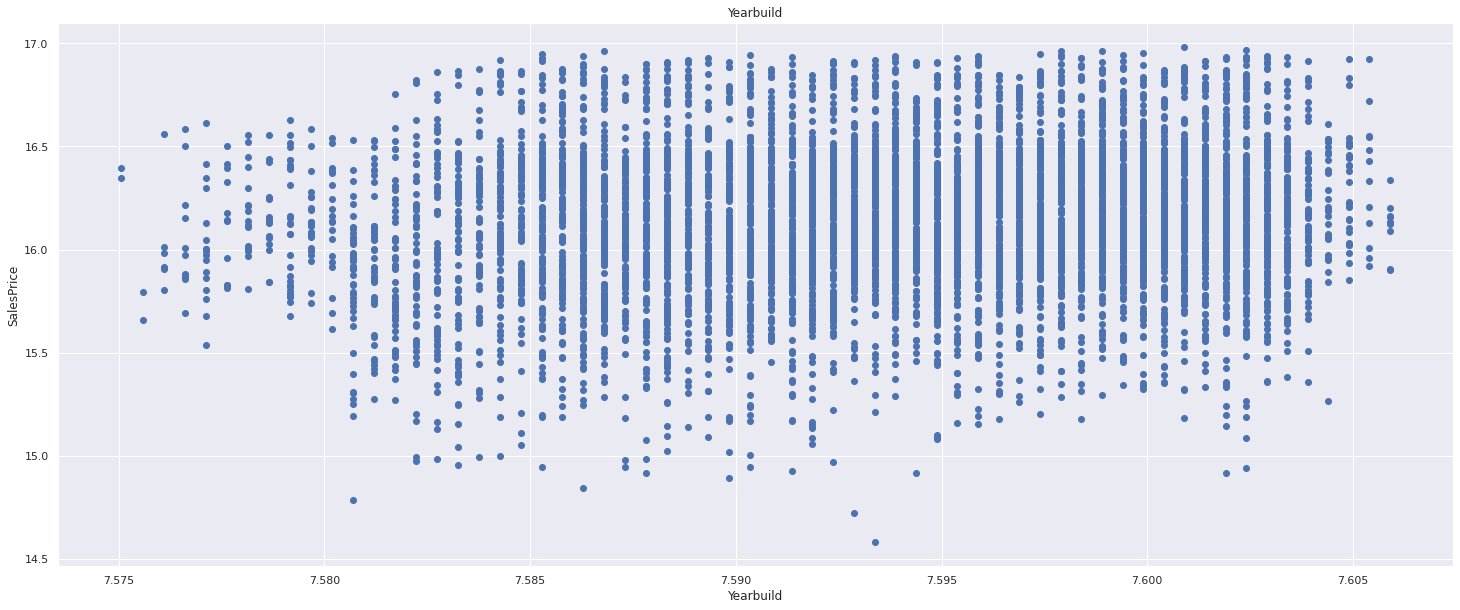

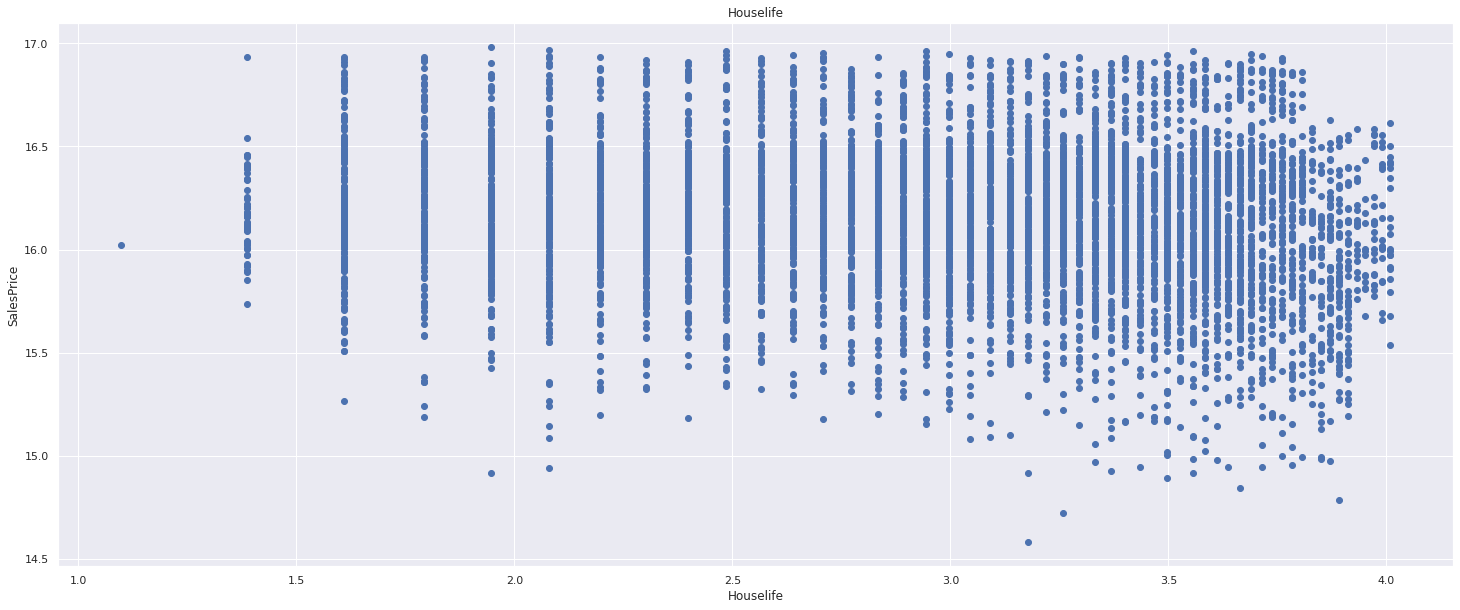

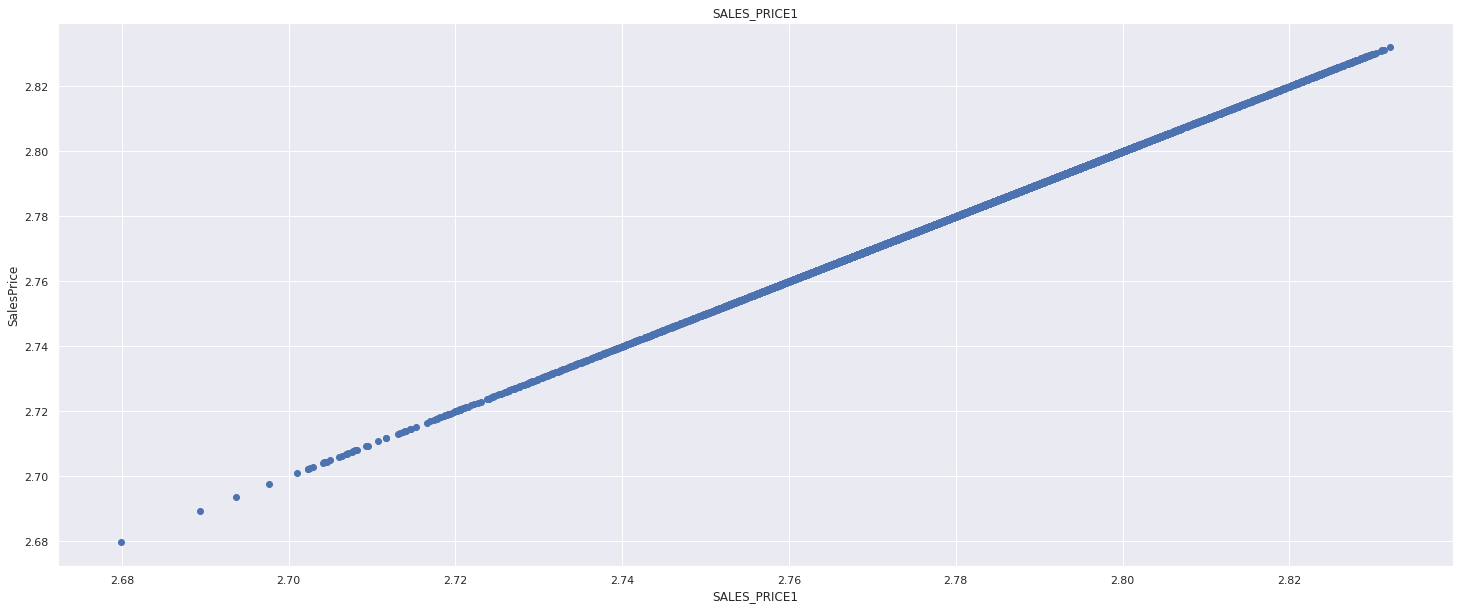

In [85]:
#Now we will use Logarithmic Transformation
for feature in continuous_feature:
    data=chennai.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        plt.scatter(data[feature],data['SALES_PRICE1'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

INT_SQFT & SALES_PRICE1 have a linear relationship

12.**Relationship between Year of the house sold and sales price**

Text(0.5, 1.0, 'House Price vs YearSold')

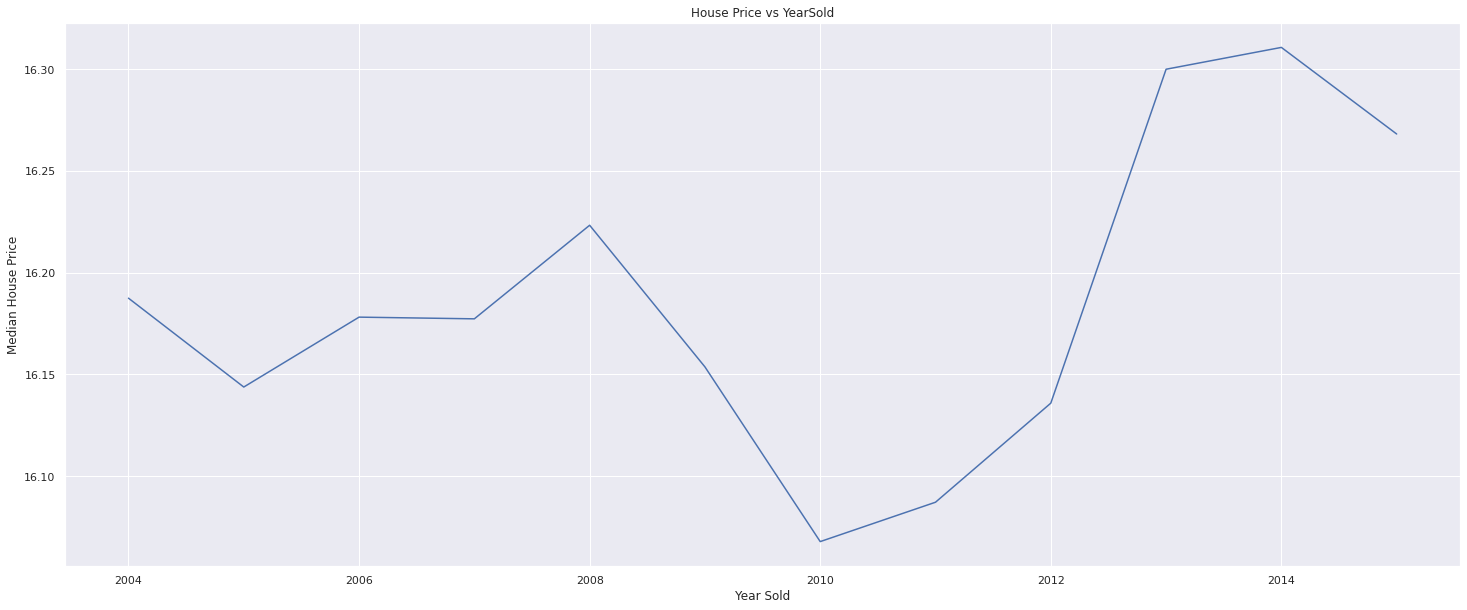

In [87]:
chennai.groupby('Yearsold')['SALES_PRICE1'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

There is a big trough between the year 2008-2010.

13.**Relationship between lifetime of house and sales price**

Text(0.5, 1.0, 'House life vs salesprice')

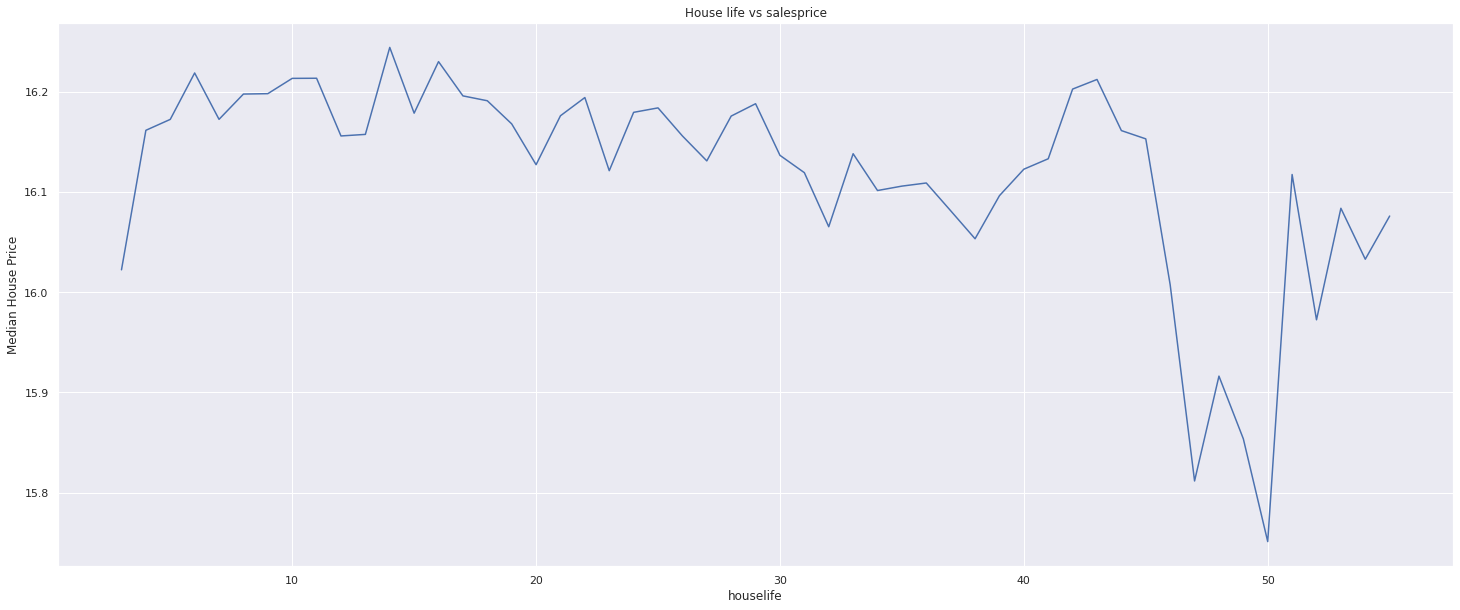

In [88]:
chennai.groupby('Houselife')['SALES_PRICE1'].median().plot()
plt.xlabel('houselife')
plt.ylabel('Median House Price')
plt.title("House life vs salesprice")

houselife near 45 years has more price

#**FEATURE ENGINEERING AND FEATURE SELECTION**

#1.**Some columns don't have realtion with sales price so drop out them which makes no sense**
'REG_FEE','COMMIS'=This features has no relationship in house price 

QS_ROOMS','QS_BEDROOM','QS_OVERALL','N_BEDROOM','QS_BATHROOM','Yearsold',"DIST_MAINROAD"=This features defines as the quantity of rooms can drop them out

"N_ROOM"-Is highly correlated with INTSQT so can able to drop cause we included the INTSQT either one is enough

In [90]:
chennai=chennai.drop(columns=["REG_FEE","COMMIS",'QS_ROOMS','QS_BEDROOM','QS_OVERALL','N_BEDROOM','QS_BATHROOM',"Yearsold","N_ROOM","DIST_MAINROAD"])

In [91]:
chennai.head()

AREA  INT_SQFT  N_BATHROOM SALE_COND PARK_FACIL   BUILDTYPE  \
0  Karapakkam      1004         1.0  AbNormal        Yes  Commercial   
1  Anna Nagar      1986         1.0  AbNormal         No  Commercial   
2       Adyar       909         1.0  AbNormal        Yes  Commercial   
3   Velachery      1855         2.0    Family         No      Others   
4  Karapakkam      1226         1.0  AbNormal        Yes      Others   

  UTILITY_AVAIL  STREET MZZONE  Yearbuild  Houselife  SALES_PRICE1  
0        AllPub   Paved      A       1967         44     15.843659  
1        AllPub  Gravel     RH       1995         11     16.893641  
2           ELO  Gravel     RL       1992         20     16.392632  
3        NoSeWa   Paved      I       1988         22     16.080424  
4        AllPub  Gravel      C       1979         30     15.817835

## 2. **Seperating categorical variable for Encoding purpose**

We can't drop MZZONE cause salesprice will change according to high security of the places

In [92]:
cat=chennai[['AREA','UTILITY_AVAIL','PARK_FACIL','BUILDTYPE','STREET','SALE_COND','MZZONE']]
cat

AREA UTILITY_AVAIL PARK_FACIL   BUILDTYPE     STREET    SALE_COND  \
0     Karapakkam        AllPub        Yes  Commercial      Paved     AbNormal   
1     Anna Nagar        AllPub         No  Commercial     Gravel     AbNormal   
2          Adyar           ELO        Yes  Commercial     Gravel     AbNormal   
3      Velachery        NoSeWa         No      Others      Paved       Family   
4     Karapakkam        AllPub        Yes      Others     Gravel     AbNormal   
...          ...           ...        ...         ...        ...          ...   
7104  Karapakkam           ELO         No      Others  No Access      AdjLand   
7105   Velachery        NoSeWa        Yes      Others  No Access       Family   
7106   Velachery        NoSeWa         No       House     Gravel  Normal Sale   
7107  Karapakkam           ELO        Yes  Commercial      Paved      Partial   
7108   Velachery           ELO        Yes      Others      Paved      Partial   

     MZZONE  
0         A  
1        RH  
2        RL  
3         I  
4         C  
...     ...  
7104     RM  
7105     RH  
7106      I  
7107     RL  
7108      I  

[7056 rows x 7 columns]

## 3. **Seperating numerical variable for Encoding purpose**

In [93]:
num=chennai[["INT_SQFT","SALES_PRICE1","Yearbuild","Houselife"]]
num

INT_SQFT  SALES_PRICE1  Yearbuild  Houselife
0         1004     15.843659       1967         44
1         1986     16.893641       1995         11
2          909     16.392632       1992         20
3         1855     16.080424       1988         22
4         1226     15.817835       1979         30
...        ...           ...        ...        ...
7104       598     15.493168       1962         49
7105      1897     16.196766       1995          9
7106      1614     15.937941       1978         28
7107       787     15.956400       1977         32
7108      1896     16.115741       1961         44

[7056 rows x 4 columns]

# **Encoding of the data**


1.**One hot encoding for Multiple categorical variables**

In [94]:
one_hot_encoded_data = pd.get_dummies(cat)
one_hot_encoded_data

AREA_Adyar  AREA_Anna Nagar  AREA_Chrompet  AREA_KK Nagar  \
0              0                0              0              0   
1              0                1              0              0   
2              1                0              0              0   
3              0                0              0              0   
4              0                0              0              0   
...          ...              ...            ...            ...   
7104           0                0              0              0   
7105           0                0              0              0   
7106           0                0              0              0   
7107           0                0              0              0   
7108           0                0              0              0   

      AREA_Karapakkam  AREA_T Nagar  AREA_Velachery  UTILITY_AVAIL_AllPub  \
0                   1             0               0                     1   
1                   0             0               0                     1   
2                   0             0               0                     0   
3                   0             0               1                     0   
4                   1             0               0                     1   
...               ...           ...             ...                   ...   
7104                1             0               0                     0   
7105                0             0               1                     0   
7106                0             0               1                     0   
7107                1             0               0                     0   
7108                0             0               1                     0   

      UTILITY_AVAIL_ELO  UTILITY_AVAIL_NoSeWa  ...  SALE_COND_AdjLand  \
0                     0                     0  ...                  0   
1                     0                     0  ...                  0   
2                     1                     0  ...                  0   
3                     0                     1  ...                  0   
4                     0                     0  ...                  0   
...                 ...                   ...  ...                ...   
7104                  1                     0  ...                  1   
7105                  0                     1  ...                  0   
7106                  0                     1  ...                  0   
7107                  1                     0  ...                  0   
7108                  1                     0  ...                  0   

      SALE_COND_Family  SALE_COND_Normal Sale  SALE_COND_Partial  MZZONE_A  \
0                    0                      0                  0         1   
1                    0                      0                  0         0   
2                    0                      0                  0         0   
3                    1                      0                  0         0   
4                    0                      0                  0         0   
...                ...                    ...                ...       ...   
7104                 0                      0                  0         0   
7105                 1                      0                  0         0   
7106                 0                      1                  0         0   
7107                 0                      0                  1         0   
7108                 0                      0                  1         0   

      MZZONE_C  MZZONE_I  MZZONE_RH  MZZONE_RL  MZZONE_RM  
0            0         0          0          0          0  
1            0         0          1          0          0  
2            0         0          0          1          0  
3            0         1          0          0          0  
4            1         0          0          0          0  
...        ...       ...        ...        ...        ...  
7104         0         0          0       

In [95]:
X=pd.merge(one_hot_encoded_data,num,left_index = True, right_index = True)
X

AREA_Adyar  AREA_Anna Nagar  AREA_Chrompet  AREA_KK Nagar  \
0              0                0              0              0   
1              0                1              0              0   
2              1                0              0              0   
3              0                0              0              0   
4              0                0              0              0   
...          ...              ...            ...            ...   
7104           0                0              0              0   
7105           0                0              0              0   
7106           0                0              0              0   
7107           0                0              0              0   
7108           0                0              0              0   

      AREA_Karapakkam  AREA_T Nagar  AREA_Velachery  UTILITY_AVAIL_AllPub  \
0                   1             0               0                     1   
1                   0             0               0                     1   
2                   0             0               0                     0   
3                   0             0               1                     0   
4                   1             0               0                     1   
...               ...           ...             ...                   ...   
7104                1             0               0                     0   
7105                0             0               1                     0   
7106                0             0               1                     0   
7107                1             0               0                     0   
7108                0             0               1                     0   

      UTILITY_AVAIL_ELO  UTILITY_AVAIL_NoSeWa  ...  MZZONE_A  MZZONE_C  \
0                     0                     0  ...         1         0   
1                     0                     0  ...         0         0   
2                     1                     0  ...         0         0   
3                     0                     1  ...         0         0   
4                     0                     0  ...         0         1   
...                 ...                   ...  ...       ...       ...   
7104                  1                     0  ...         0         0   
7105                  0                     1  ...         0         0   
7106                  0                     1  ...         0         0   
7107                  1                     0  ...         0         0   
7108                  1                     0  ...         0         0   

      MZZONE_I  MZZONE_RH  MZZONE_RL  MZZONE_RM  INT_SQFT  SALES_PRICE1  \
0            0          0          0          0      1004     15.843659   
1            0          1          0          0      1986     16.893641   
2            0          0          1          0       909     16.392632   
3            1          0          0          0      1855     16.080424   
4            0          0          0          0      1226     15.817835   
...        ...        ...        ...        ...       ...           ...   
7104         0          0          0          1       598     15.493168   
7105         0          1          0          0      1897     16.196766   
7106         1          0          0          0      1614     15.937941   
7107         0          0          1          0       787     15.956400   
7108         1          0          0          0      1896     16.115741   

      Yearbuild  Houselife  
0          1967         44  
1          1995         11  
2          1992         20  
3          1988         22  
4          1979         30  
...         ...        ...  
7104       1962         49  
7105       1995          9  
7106       1978         28  
7107       1977         32  
7108       1961         44  

[7056 rows x 33 columns]

In [96]:
X.shape

(7056, 33)

In [97]:
Y=X['SALES_PRICE1']
Y

0       15.843659
1       16.893641
2       16.392632
3       16.080424
4       15.817835
          ...    
7104    15.493168
7105    16.196766
7106    15.937941
7107    15.956400
7108    16.115741
Name: SALES_PRICE1, Length: 7056, dtype: float64

In [98]:
X=X.drop(columns='SALES_PRICE1')
X

AREA_Adyar  AREA_Anna Nagar  AREA_Chrompet  AREA_KK Nagar  \
0              0                0              0              0   
1              0                1              0              0   
2              1                0              0              0   
3              0                0              0              0   
4              0                0              0              0   
...          ...              ...            ...            ...   
7104           0                0              0              0   
7105           0                0              0              0   
7106           0                0              0              0   
7107           0                0              0              0   
7108           0                0              0              0   

      AREA_Karapakkam  AREA_T Nagar  AREA_Velachery  UTILITY_AVAIL_AllPub  \
0                   1             0               0                     1   
1                   0             0               0                     1   
2                   0             0               0                     0   
3                   0             0               1                     0   
4                   1             0               0                     1   
...               ...           ...             ...                   ...   
7104                1             0               0                     0   
7105                0             0               1                     0   
7106                0             0               1                     0   
7107                1             0               0                     0   
7108                0             0               1                     0   

      UTILITY_AVAIL_ELO  UTILITY_AVAIL_NoSeWa  ...  SALE_COND_Partial  \
0                     0                     0  ...                  0   
1                     0                     0  ...                  0   
2                     1                     0  ...                  0   
3                     0                     1  ...                  0   
4                     0                     0  ...                  0   
...                 ...                   ...  ...                ...   
7104                  1                     0  ...                  0   
7105                  0                     1  ...                  0   
7106                  0                     1  ...                  0   
7107                  1                     0  ...                  1   
7108                  1                     0  ...                  1   

      MZZONE_A  MZZONE_C  MZZONE_I  MZZONE_RH  MZZONE_RL  MZZONE_RM  INT_SQFT  \
0            1         0         0          0          0          0      1004   
1            0         0         0          1          0          0      1986   
2            0         0         0          0          1          0       909   
3            0         0         1          0          0          0      1855   
4            0         1         0          0          0          0      1226   
...        ...       ...       ...        ...        ...        ...       ...   
7104         0         0         0          0          0          1       598   
7105         0         0         0          1          0          0      1897   
7106         0         0         1          0          0          0      1614   
7107         0         0         0          0          1          0       787   
7108         0         0         1          0          0          0      1896   

      Yearbuild  Houselife  
0          1967         44  
1          1995         11  
2          1992         20  
3          1988         22  
4          1979         30  
...         ...        ...  
7104       1962         49  
7105       1995          9  
7106       1978         28  
7107       1977         32  
7108       1961         44  

[7056 rows x 32 columns]

#**FEATURE SPLITTING AND SCALING** 

1.**Features splitting shape of the datas shown**

In [99]:
# Input Data
# X = features

# Output Data
# Y = SALESPRICE

# splitting data to training and testing dataset.

#from sklearn.cross_validation import train_test_split
#the submodule cross_validation is renamed and reprecated to model_selection
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2,random_state = 1)

print("xtrain shape : ", X_train.shape)
print("xtest shape : ", X_test.shape)
print("ytrain shape : ", Y_train.shape)
print("ytest shape : ", Y_test.shape)
XP=X_test.copy()

xtrain shape :  (5644, 32)
xtest shape :  (1412, 32)
ytrain shape :  (5644,)
ytest shape :  (1412,)


2. **Using Standardization for scalingt**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit will learn the values of mu and sigma while transform will transform the data from X to (X-mu)/sigma
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

#**Model Fitting**

# **XG BOOST Algorithm And Fit the Model**

In [100]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100) # initialise the model
  model.fit(X_train,Y_train) #train the model
  model.score(X_test, Y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,Y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, Y_train, cv=10)))

[12:13:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

 In the learning rate of **0.8** it has highest validation score **0.9945**
# Best Model in the prediction. 

In [101]:
model1 = xgb.XGBRegressor(learning_rate = 0.8, n_estimators=100) # initialise the model
model1.fit(X_train,Y_train) #train the model
model1.score(X_test, Y_test) # scoring the model - r2 squared
print("Learning rate : ", 0.8, " Train score : ", model1.score(X_train,Y_train), " Cross-Val score : ", np.mean(cross_val_score(model1, X_train, Y_train, cv=10)))

[12:16:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:16:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:16:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:16:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:16:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:16:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:16:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:16:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Learning rate :  **0.8**   Train score :  **0.9975**
Cross-Val score :  **0.9945**

##  **Finding the Feature importances**

[0.00418796 0.00459709 0.00311455 0.03303777 0.2061545  0.0016094
 0.04807242 0.00607786 0.00104376 0.00073143 0.02859525 0.
 0.17357123 0.03946716 0.00034042 0.02924402 0.01078492 0.00207054
 0.         0.01227966 0.00231968 0.00021635 0.00645846 0.12257804
 0.07694355 0.01553135 0.00295997 0.01231131 0.06229581 0.0830274
 0.00894531 0.00143281]


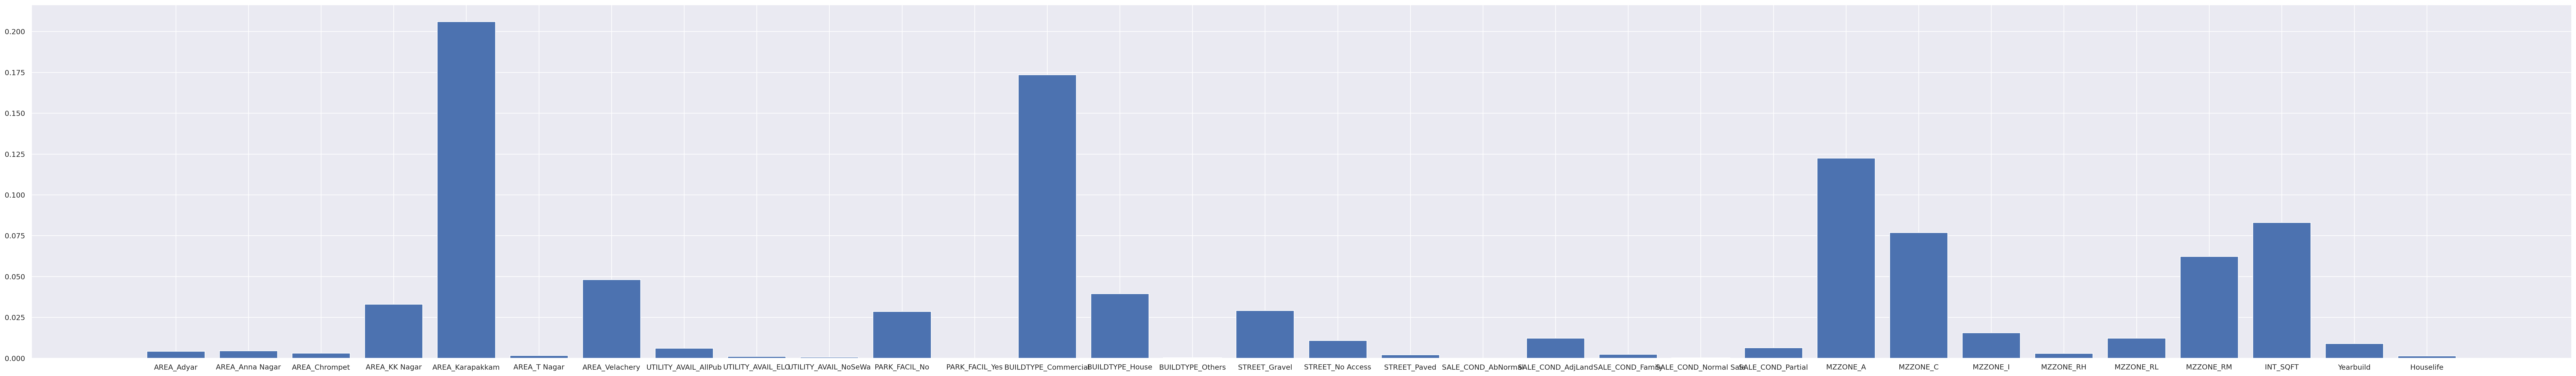

In [102]:
print(model1.feature_importances_)
from matplotlib.pyplot import figure
figure(figsize=(70,10),dpi=200)
# plot
plt.bar(X.columns,model1.feature_importances_)
plt.show()

## The important factors that contribute towards
#the price is **AREA_Karapakkam=0.20** It is playing a big role

In [103]:
coefficients = pd.DataFrame(model1.feature_importances_,X.columns)
coefficients.columns = ['coefficients']
coefficients

coefficients
AREA_Adyar                 0.004188
AREA_Anna Nagar            0.004597
AREA_Chrompet              0.003115
AREA_KK Nagar              0.033038
AREA_Karapakkam            0.206154
AREA_T Nagar               0.001609
AREA_Velachery             0.048072
UTILITY_AVAIL_AllPub       0.006078
UTILITY_AVAIL_ELO          0.001044
UTILITY_AVAIL_NoSeWa       0.000731
PARK_FACIL_No              0.028595
PARK_FACIL_Yes             0.000000
BUILDTYPE_Commercial       0.173571
BUILDTYPE_House            0.039467
BUILDTYPE_Others           0.000340
STREET_Gravel              0.029244
STREET_No Access           0.010785
STREET_Paved               0.002071
SALE_COND_AbNormal         0.000000
SALE_COND_AdjLand          0.012280
SALE_COND_Family           0.002320
SALE_COND_Normal Sale      0.000216
SALE_COND_Partial          0.006458
MZZONE_A                   0.122578
MZZONE_C                   0.076944
MZZONE_I                   0.015531
MZZONE_RH                  0.002960
MZZONE_RL                  0.012311
MZZONE_RM                  0.062296
INT_SQFT                   0.083027
Yearbuild                  0.008945
Houselife                  0.001433

## **Sales prices in the log format so here converting into antilog so that we can get exact price**

In [104]:
Y_pred=model1.predict(X_test)
Y_pred

array([15.932421, 15.885935, 16.04266 , ..., 15.848782, 15.928349,
       15.770496], dtype=float32)

R2 Value for XG boost

In [105]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('R2- SCORE:', metrics.r2_score(Y_test,Y_pred))

Mean Absolute Error: 0.016747001233454437
Mean Squared Error: 0.000544980429134993
R2- SCORE: 0.9955344962302038


R2-score is 99.5% almost=100% accuracy

## **Plotting Scatter graph to show the prediction**
# results - 'ytrue' value vs 'y_pred' value

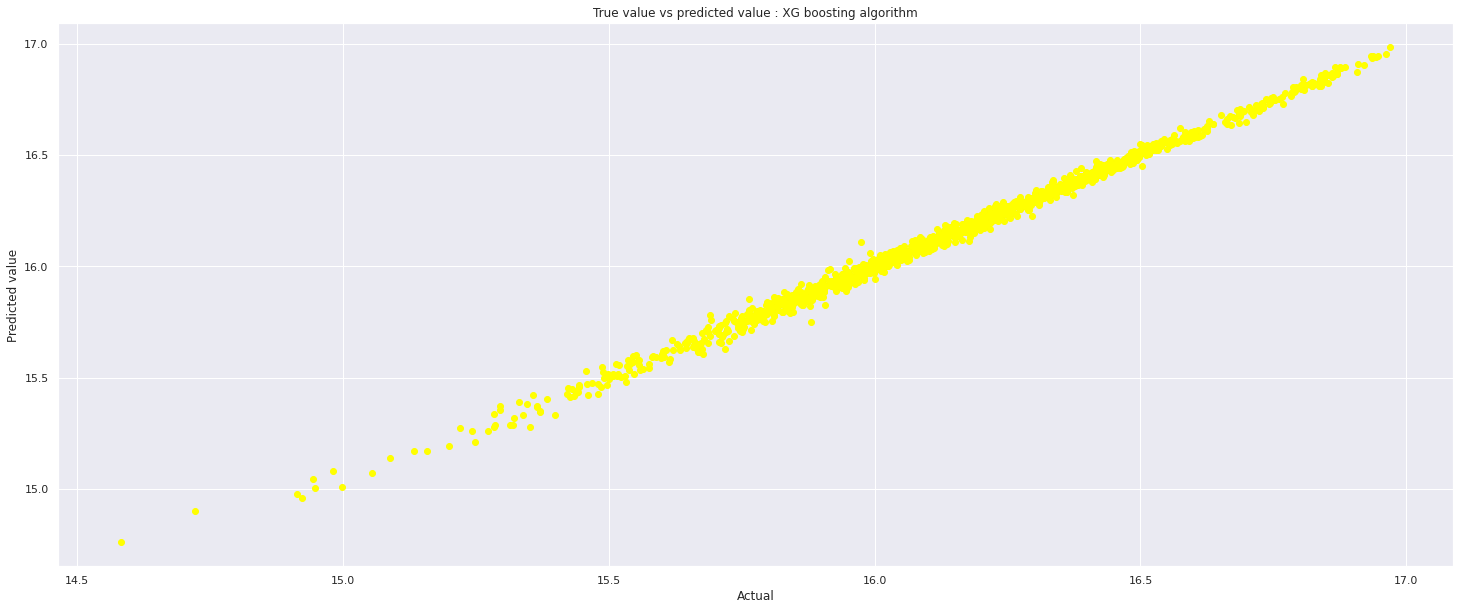

In [107]:
#Plotting Scatter graph to show the prediction
# results - 'ytrue' value vs 'y_pred' value
plt.scatter(Y_test, Y_pred, c = 'yellow')
plt.xlabel("Actual")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : XG boosting algorithm")
plt.show()

There is a good linear line almost the model predict 99% accurately

In [108]:
df1 = pd.DataFrame({'Actual_price': Y_test, 'Predicted_price': Y_pred})
df1

Actual_price  Predicted_price
2646     15.921337        15.932421
5805     15.830514        15.885935
6148     16.031328        16.042660
3857     16.306453        16.298473
2401     16.100677        16.113083
...            ...              ...
1304     16.859550        16.850853
4887     16.413600        16.407225
6890     15.825083        15.848782
3420     15.927790        15.928349
4687     15.770845        15.770496

[1412 rows x 2 columns]

In [109]:
XP.head()

AREA_Adyar  AREA_Anna Nagar  AREA_Chrompet  AREA_KK Nagar  \
2646           0                0              1              0   
5805           0                0              0              0   
6148           0                0              1              0   
3857           0                0              1              0   
2401           1                0              0              0   

      AREA_Karapakkam  AREA_T Nagar  AREA_Velachery  UTILITY_AVAIL_AllPub  \
2646                0             0               0                     0   
5805                1             0               0                     0   
6148                0             0               0                     0   
3857                0             0               0                     1   
2401                0             0               0                     0   

      UTILITY_AVAIL_ELO  UTILITY_AVAIL_NoSeWa  ...  SALE_COND_Partial  \
2646                  0                     1  ...                  0   
5805                  0                     1  ...                  0   
6148                  0                     1  ...                  0   
3857                  0                     0  ...                  0   
2401                  0                     1  ...                  0   

      MZZONE_A  MZZONE_C  MZZONE_I  MZZONE_RH  MZZONE_RL  MZZONE_RM  INT_SQFT  \
2646         0         0         0          1          0          0       972   
5805         0         0         0          1          0          0      1232   
6148         0         0         0          0          1          0      1015   
3857         0         0         0          0          1          0      1128   
2401         0         0         0          1          0          0      1288   

      Yearbuild  Houselife  
2646       2004          7  
5805       1986         25  
6148       1995         17  
3857       1977         35  
2401       1983         28  

[5 rows x 32 columns]

In [110]:
df1["yearsale"]=XP['Yearbuild']+XP["Houselife"]
df1

Actual_price  Predicted_price  yearsale
2646     15.921337        15.932421      2011
5805     15.830514        15.885935      2011
6148     16.031328        16.042660      2012
3857     16.306453        16.298473      2012
2401     16.100677        16.113083      2011
...            ...              ...       ...
1304     16.859550        16.850853      2011
4887     16.413600        16.407225      2011
6890     15.825083        15.848782      2010
3420     15.927790        15.928349      2009
4687     15.770845        15.770496      2005

[1412 rows x 3 columns]

In [111]:
from datetime import date
df1["yearpassed"]=(date.today().year)-df1["yearsale"]
df1

Actual_price  Predicted_price  yearsale  yearpassed
2646     15.921337        15.932421      2011          11
5805     15.830514        15.885935      2011          11
6148     16.031328        16.042660      2012          10
3857     16.306453        16.298473      2012          10
2401     16.100677        16.113083      2011          11
...            ...              ...       ...         ...
1304     16.859550        16.850853      2011          11
4887     16.413600        16.407225      2011          11
6890     15.825083        15.848782      2010          12
3420     15.927790        15.928349      2009          13
4687     15.770845        15.770496      2005          17

[1412 rows x 4 columns]

In [112]:
df1["Predicted_price"]=np.exp(df1["Predicted_price"].values)
df1["Actual_price"]=np.exp(df1["Actual_price"].values)
df1

Actual_price  Predicted_price  yearsale  yearpassed
2646     8213890.0        8305435.0      2011          11
5805     7500750.0        7928186.0      2011          11
6148     9168900.0        9273392.0      2012          10
3857    12072650.0       11976696.0      2012          10
2401     9827320.0        9949998.0      2011          11
...            ...              ...       ...         ...
1304    20989850.0       20808102.0      2011          11
4887    13438040.0       13352639.0      2011          11
6890     7460125.0        7639033.5      2010          12
3420     8267060.0        8271683.0      2009          13
4687     7066280.0        7063818.5      2005          17

[1412 rows x 4 columns]

In [113]:
pd.set_option('display.float_format', '{:.2f}'.format)


**Price today=Price historical*(1+ rate of inflation)^(years passed)**


What is inflation?

Because of the rate of inflation here we need to adjust the sales price for today rate
Notably, the RBI had projected **CPI inflation at 5.3 percent** for fiscal year **2021-22**. This includes a projection of **5.1** percent in the second quarter, **4.5** percent in third,** 5.8** percent in the last quarter of the fiscal, with risks broadly balanced.

assume **5%**rate of inflation and get the value of today price,

In [114]:
df1["Today_price"]=(df1["Predicted_price"])*((1+0.05)**(df1["yearpassed"]))
df1


Actual_price  Predicted_price  yearsale  yearpassed  Today_price
2646    8213890.00       8305435.00      2011          11  14205112.37
5805    7500750.00       7928186.00      2011          11  13559888.55
6148    9168900.00       9273392.00      2012          10  15105378.40
3857   12072650.00      11976696.00      2012          10  19508775.76
2401    9827320.00       9949998.00      2011          11  17017873.19
...            ...              ...       ...         ...          ...
1304   20989850.00      20808102.00      2011          11  35588915.82
4887   13438040.00      13352639.00      2011          11  22837544.02
6890    7460125.00       7639033.50      2010          12  13718606.64
3420    8267060.00       8271683.00      2009          13  15597491.95
4687    7066280.00       7063818.50      2005          17  16190401.40

[1412 rows x 5 columns]

##**Linear regression model fitting**

In [115]:
# Fitting Multi Linear regression model to training model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train,Y_train)

# predicting the test set results
Y_pred1 = regressor.predict(X_test)

In [116]:
coefficients_linear = pd.DataFrame(regressor.coef_,X.columns)
coefficients_linear.columns = ['coefficients_linear']
coefficients_linear

coefficients_linear
AREA_Adyar                            0.10
AREA_Anna Nagar                       0.14
AREA_Chrompet                         0.05
AREA_KK Nagar                        -0.16
AREA_Karapakkam                      -0.19
AREA_T Nagar                          0.14
AREA_Velachery                       -0.07
UTILITY_AVAIL_AllPub                  0.02
UTILITY_AVAIL_ELO                    -0.02
UTILITY_AVAIL_NoSeWa                 -0.00
PARK_FACIL_No                        -0.05
PARK_FACIL_Yes                        0.05
BUILDTYPE_Commercial                  0.25
BUILDTYPE_House                      -0.16
BUILDTYPE_Others                     -0.09
STREET_Gravel                         0.06
STREET_No Access                     -0.06
STREET_Paved                          0.01
SALE_COND_AbNormal                    0.00
SALE_COND_AdjLand                     0.03
SALE_COND_Family                     -0.01
SALE_COND_Normal Sale                 0.00
SALE_COND_Partial                    -0.03
MZZONE_A                             -0.19
MZZONE_C                             -0.11
MZZONE_I                             -0.02
MZZONE_RH                             0.05
MZZONE_RL                             0.11
MZZONE_RM                             0.17
INT_SQFT                              0.00
Yearbuild                            -0.00
Houselife                            -0.00

In [117]:
df2 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred1})
df2

Actual  Predicted
2646   15.92      15.93
5805   15.83      15.80
6148   16.03      16.02
3857   16.31      16.27
2401   16.10      16.08
...      ...        ...
1304   16.86      16.89
4887   16.41      16.50
6890   15.83      15.80
3420   15.93      15.87
4687   15.77      15.82

[1412 rows x 2 columns]

##**Plotting Scatter graph to show the prediction**
# results - 'ytrue' value vs 'y_pred' value

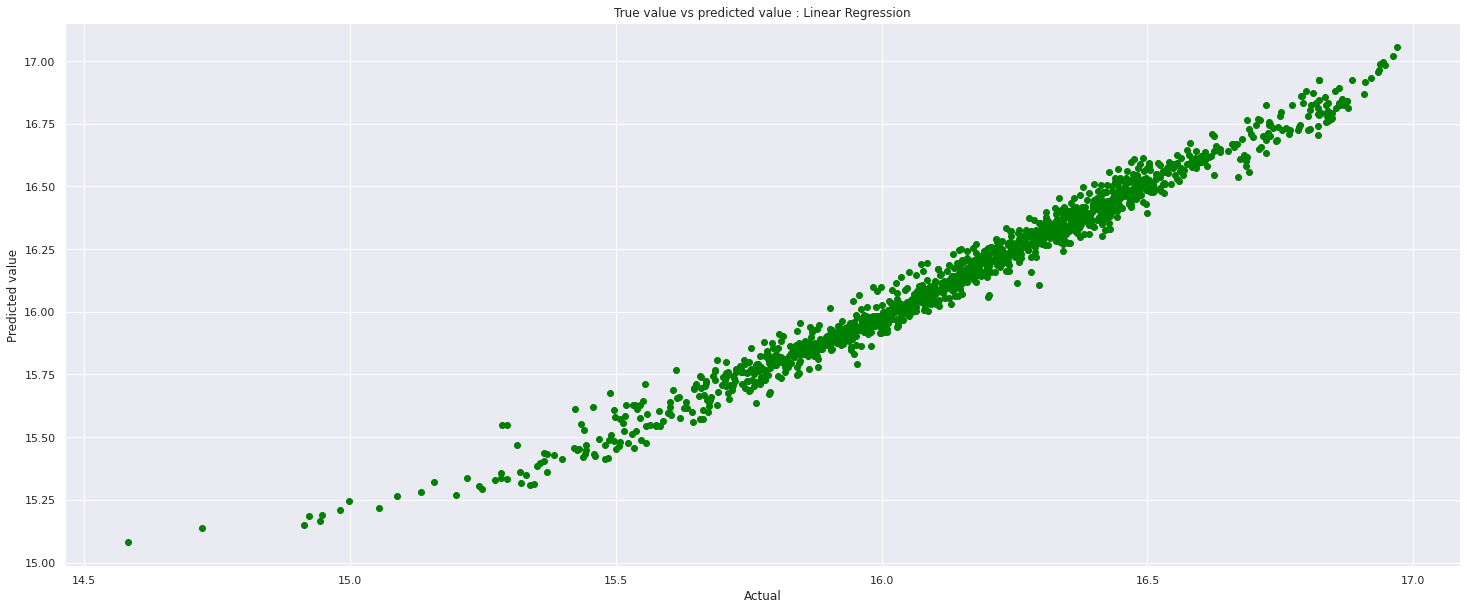

In [118]:
#Plotting Scatter graph to show the prediction
# results - 'ytrue' value vs 'y_pred' value
plt.scatter(Y_test, Y_pred1, c = 'green')
plt.xlabel("Actual")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

There is a good Linear Line

##**Linear Model Evaluation**

In [119]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred1))
print('R2- SCORE:', metrics.r2_score(Y_test,Y_pred1))

Mean Absolute Error: 0.03748918488022971
Mean Squared Error: 0.0028045203268057014
R2- SCORE: 0.977020099397517


##**Random Forest model fitting**

[0.9753322134267857,
 0.9781857786493612,
 0.980331062486221,
 0.9795406743144861,
 0.9806215073313166,
 0.9799376993704547,
 0.980322530386143,
 0.9806297306688082,
 0.9807301174864116,
 0.9805967537344036,
 0.9809356756835828,
 0.98090964069853,
 0.9808506241788054,
 0.9808705288388347,
 0.9809400206516259,
 0.9808831034390648,
 0.9807448481641441,
 0.9809582732438833,
 0.9809470919753891]

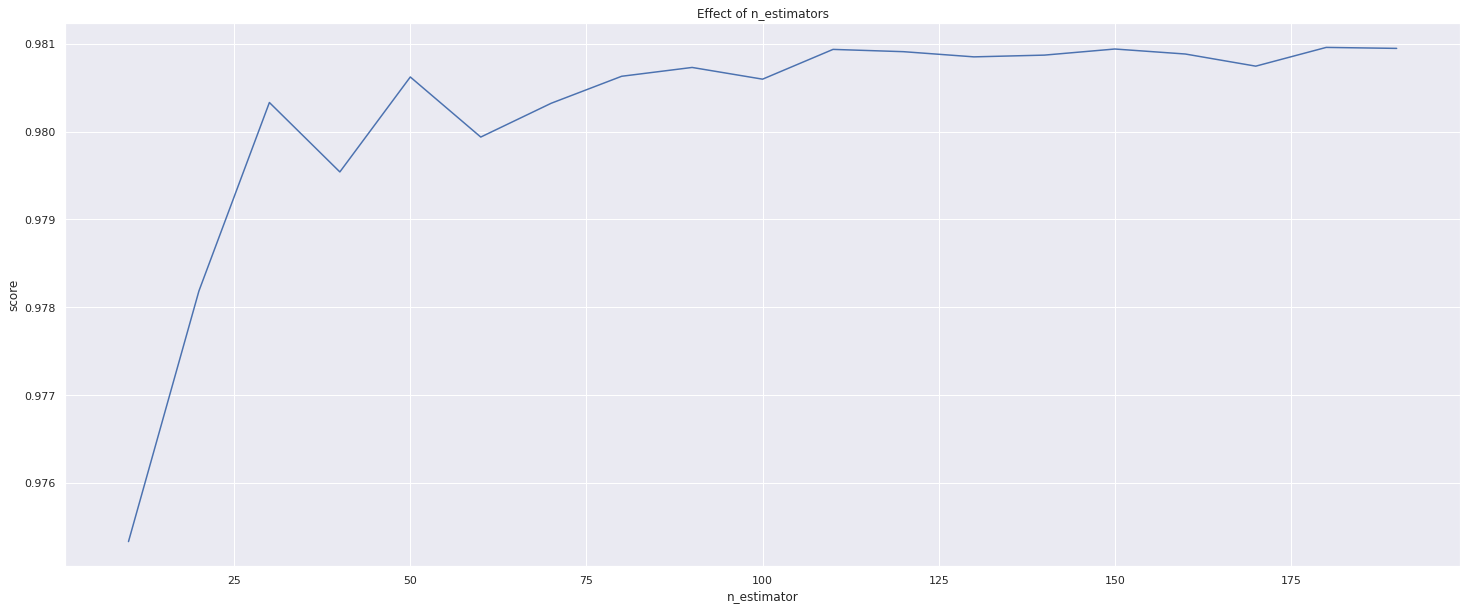

In [120]:
# Try different numbers of n_estimators - this will take a minute or so
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
scores

In [ ]:
model4 = RandomForestRegressor()
model4.fit(X_train, Y_train)

In [ ]:
c=model4.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, c))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, c))
print('R2- SCORE:', metrics.r2_score(Y_test,c))

##**Decision Tree model fitting**

In [121]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
model3 = DecisionTreeRegressor()

model3.fit(X_train,Y_train)
a = model3.predict(X_test)


In [122]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, a))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, a))
print('R2- SCORE:', metrics.r2_score(Y_test,a))

Mean Absolute Error: 0.05153537643870863
Mean Squared Error: 0.005231055081249771
R2- SCORE: 0.9571373668914893


##**KNN model fitting**

In [123]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor()
clf.fit(X_train, Y_train)
b= clf.predict(X_test)

In [124]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, b))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, b))
print('R2- SCORE:', metrics.r2_score(Y_test,b))

Mean Absolute Error: 0.21498428898011634
Mean Squared Error: 0.07501214370409863
R2- SCORE: 0.3853595604840201


**Conclusion:**

1)I fit a 100% accuracy model by **XG boosting algorithm**.

2)Categorical variables playing a big role here,accordingly sellers can build the house to fetch more money,Area Karapaakam has more sales so if sellers build the house there they can able to get more money.